---
##**FINAL PROJECT 4 (MANDIRI)**
---

---
#**Perkenalan**
---

##**Latar Belakang**
Bank-bank memainkan peran penting dalam pengembangan dan penerbitan kartu kredit. Mereka melihat potensi bisnis yang signifikan dalam menyediakan alat pembayaran yang mudah dan aman bagi konsumen. Dalam model bisnis ini, bank menerbitkan kartu kredit kepada pelanggan mereka dan memfasilitasi transaksi pembayaran. Kartu kredit bank beroperasi berdasarkan prinsip pinjaman yang bersifat revolusioner. Bank memberikan kredit kepada pemegang kartu untuk melakukan pembelian dan pembayaran, dan pemegang kartu diharapkan membayar kembali jumlah kredit tersebut dalam jangka waktu tertentu, biasanya bulanan. Jika pemegang kartu tidak melunasi jumlah yang terutang, maka bank akan mengenakan bunga pada saldo yang masih tertunda. Seiring waktu, kartu kredit bank berkembang menjadi instrumen keuangan yang lebih kompleks. Mereka menawarkan berbagai jenis manfaat seperti program loyalitas, poin reward, asuransi perjalanan, perlindungan pembelian, dan akses ke fasilitas khusus seperti akses lounge bandara. Beberapa kartu kredit juga menawarkan tingkat keamanan yang lebih tinggi dengan teknologi chip dan PIN atau pembayaran nirkontak.

Oleh karena kartu kredit bank semakin berkembang menjadi instrumen keuangan yang lebih kompleks, maka diperlukan suatu pengawasan atau analisis bagi bank untuk dapat mengembangkan segmentasi pelanggan yang lebih baik berdasarkan perilaku penggunaan kartu kredit. Dengan pemahaman yang lebih baik tentang preferensi dan kebiasaan pengguna kartu kredit, bank dapat merancang strategi pemasaran yang lebih efektif, termasuk penawaran khusus, program loyalitas, atau pengembangan produk yang disesuaikan dengan kebutuhan pelanggan.

##**Dataset**

Dataset "CC GENERAL.csv" merangkum perilaku penggunaan sekitar 9000 pemegang kartu kredit aktif selama 6 bulan terakhir. File tersebut berada di tingkat pelanggan dengan 18 variabel perilaku yang dapat digunakan untuk untuk mengembangkan segmentasi pelanggan dalam menentukan strategi pemasaran.

>Dataset yang digunakan pada analisis ini yaitu Credit Card Dataset for Clustering. Dataset yang diunduh dari kaggle melalui link berikut _[credit card dataset](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata)_


##**Atribut Information**

Adapun atribut pada data yang digunakan adalah sebagai berikut:
1. CUST_ID - Identification of Credit Card holder (Categorical)
2. BALANCE - Balance amount left in their account to make purchases
3. BALANCEFREQUENCY - How frequently the Balance is updated, score between 0
and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES - Amount of purchases made from account
5. ONEOFFPURCHASES - Maximum purchase amount done in one-go
6. INSTALLMENTSPURCHASES - Amount of purchase done in installment
7. CASHADVANCE - Cash in advance given by the user
8. PURCHASESFREQUENCY - How frequently the Purchases are being made, score
between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFFPURCHASESFREQUENCY - How frequently Purchases are happening in
one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASESINSTALLMENTSFREQUENCY - How frequently purchases in
installments are being done (1 = frequently done, 0 = not frequently done)
11. CASHADVANCEFREQUENCY - How frequently the cash in advance being paid
12. CASHADVANCETRX - Number of Transactions made with "Cash in Advance"
13. PURCHASESTRX - Number of purchase transactions made
14. CREDITLIMIT - Limit of Credit Card for user
15. PAYMENTS - Amount of Payment done by user
16. MINIMUM_PAYMENTS - Minimum amount of payments made by user
17. PRCFULLPAYMENT - Percent of full payment paid by user
18. TENURE - Tenure of credit card service for user

##**Project Objective**
Final Project 3 ini dibuat guna mengevaluasi konsep Clustering sebagai berikut:
- Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn
- Mampu mempersiapkan data untuk digunakan dalam Clustering
- Mampu mengimplementasikan Clustering pada data yang diberikan


---
##**Import Library**
---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import skew
from scipy.stats import boxcox
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score

from umap import umap_ as UMAP
import umap.plot

warnings.filterwarnings("ignore")

---
##**Data Loading**
---

In [ ]:
#Melakukan loading data dengan menggunakan pandas
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#Melakukan setting untuk menampilkan semua kolom pada dataframe serta menampilkan data
pd.set_option("display.max_columns", None)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CC GENERAL_4.csv')
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

Dari output tersebut dapat dilihat bahwa dataset memiliki 8950 baris dan 18 kolum. Namun masih terdapat NaN pada dataset.

In [ ]:
#Melihat informasi (kolom, baris, tipe data) pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Dapat dilihat bahwa atribut CREDIT_LIMIT dan MINIMUM_PAYMENTS memiliki jumlah data yang berbeda dari atribut lainnya.

In [ ]:
#Melihat banyaknya unique value
for col in df.columns:
    print(col,': ', df[col].nunique())

CUST_ID :  8950
BALANCE :  8871
BALANCE_FREQUENCY :  43
PURCHASES :  6203
ONEOFF_PURCHASES :  4014
INSTALLMENTS_PURCHASES :  4452
CASH_ADVANCE :  4323
PURCHASES_FREQUENCY :  47
ONEOFF_PURCHASES_FREQUENCY :  47
PURCHASES_INSTALLMENTS_FREQUENCY :  47
CASH_ADVANCE_FREQUENCY :  54
CASH_ADVANCE_TRX :  65
PURCHASES_TRX :  173
CREDIT_LIMIT :  205
PAYMENTS :  8711
MINIMUM_PAYMENTS :  8636
PRC_FULL_PAYMENT :  47
TENURE :  7


In [ ]:
#Melihat statistik deskriptif dari masing-masing atribut
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [ ]:
df.describe(include='O').T

count unique     top freq
CUST_ID  8950   8950  C10001    1

---
##**Data Cleaning**
---

In [ ]:
#Menampilkan jumlah data yang duplikat
df.duplicated().sum()

0

In [ ]:
#Menampilkan keberadaan ada atau tidaknya missing value
df.isnull().values.any()

True

In [ ]:
#Menjumlahkan keberadaan missing value tiap atribut
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
#Menampilkan presentase missing value di tiap atribut
(df.isnull().sum() / len(df)) * 100

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

Dapat dilihat bahwa missing value pada atribut CREDIT_LIMIT sebesar 0.01% dan pada atribut MINIMUM_PAYMENTS sebesar 3.49%.

In [ ]:
#Membuang kolom CUST_ID karena tidak diperlukan
df = df.drop('CUST_ID', axis=1)

In [ ]:
#Mengganti missing value dengan nilai Median
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(),inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(),inplace=True)

In [ ]:
#Mengecek kembali keberadaan missing value setelah diganti dengan median
df.isnull().values.any()

False

Karne False, maka sudah tidak terdapat missing value.

In [ ]:
df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000        312.343947          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365          0.500000       6  
8946   275.861322        312.343947          0.000000       6  
8947    81

Dapat dilihat bahwa setelah melakukan pergantian missing value dengan nilai median dan men-drop kolom CUST_ID, maka dataset menjadi 8950 baris dan 17 kolom.

---
##**Data Exporation**
---

**Melakukan Data Query dan Grouping**

In [ ]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8950.000000   
mean                 0.135144          3.248827      14.709832   4494.282473   
std                  0.200121          6.824647      24.857649   3638.646702   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8950.000000       8950.000000  8950.000000  
mean    1733.143852        844.906767          0.153715    11.517318  
std     2895.063757       2332.792322          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        170.857654          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        788.713501          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [ ]:
#Mengambil nilai min dan max 'PAYMENTS' pada baris-baris di mana nilai kolom 'TENURE' sama dengan 12.
df.loc[df['TENURE'] == 12, 'PAYMENTS'].agg(('min', 'max'))

min        0.00000
max    50721.48336
Name: PAYMENTS, dtype: float64

Dari hasil diketahui bahwa untuk Jangka waktu layanan kartu kredit pengguna 12 bulan, pembayaran minimalnya yaitu 0 dan pembayaran maksimalnya yaitu 50721.48336 (50721).

In [ ]:
#Mengetahui masa berlaku layanan kartu kredit pengguna
tenure_dist = df.groupby("TENURE").size().sort_values(ascending = False)
tenure_dist

TENURE
12    7584
11     365
10     236
6      204
8      196
7      190
9      175
dtype: int64

Text(0.5, 1.0, 'Masa Berlaku Layanan Kartu Kredit Pengguna')

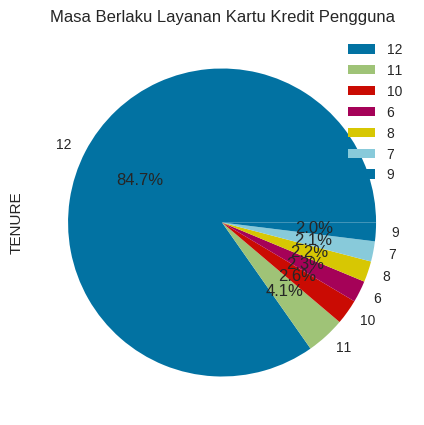

In [ ]:
#Visualiasasi atribut TENURE
tenure=pd.DataFrame(df['TENURE'].value_counts())
plot = tenure.plot.pie(y='TENURE', figsize=(8, 5), autopct="%1.1f%%")
plt.title("Masa Berlaku Layanan Kartu Kredit Pengguna")

Dari output diatas dapat dilihat bahwa masa berlaku layanan kartu kredit selama 12 bulan terdapat 7584 pengguna atau setara dengan 84.7%, 11 bulan terdapat 365 pengguna atau 4.1%, 10 bulan terdapat 236 pengguna atau 2.6%, 9 bulan sebesar 175 pengguna atau 2.0%, 8 bulan sebanyak 196 pengguna atau 2.2%, 7 bulan 190 pengguna atau 2.1%, dan 6 bulan sebanyak 204 pengguna atau 2.3%.

Dapat dilihat bahwa jumlah pengguna terbanyak yaitu dengan masa berlaku kartu kredit selama 12 bulan.

In [ ]:
#Menampilkan penarikan tunai terbesar dan terkecil
max = df.max(axis=0)['CASH_ADVANCE']
min = df.min(axis=0)['CASH_ADVANCE']
print("Penarikan tunai terbesar: ", max)
print("Penarikan tunai terkecil: ", min)

Penarikan tunai terbesar:  47137.21176
Penarikan tunai terkecil:  0.0


Text(0.5, 1.0, 'PEMBELIAN DAN PEMBAYARAN BERDASARKAN JANGKA WAKTU PERTAHUN ')

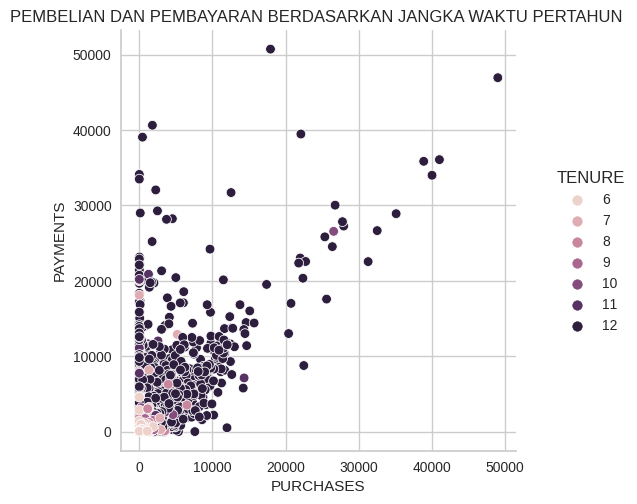

In [ ]:
#Mengecek pembelian dan pembayaran bedasarkan jangka waktu pertahun
vs = df[['PAYMENTS', 'TENURE', 'PURCHASES']]
sns.relplot(data = vs, x = 'PURCHASES', y = 'PAYMENTS', hue = 'TENURE')
plt.title('PEMBELIAN DAN PEMBAYARAN BERDASARKAN JANGKA WAKTU PERTAHUN ')

Berdasarkan plot di atas, sebaran pengguna yang melakukan pembelian dan pembayaran paling banyak adalah pengguna dengan jangka waktu kartu kredit 12 bulan, sedangkan yang terkecil ada pengguna dengan jangka waktu 6 bulan.

In [ ]:
#Menampilkan besar korelasi antara atribut PURCHASES dengan atribut lain
df.corr()['PURCHASES'].sort_values(ascending=False)

PURCHASES                           1.000000
ONEOFF_PURCHASES                    0.916845
PURCHASES_TRX                       0.689561
INSTALLMENTS_PURCHASES              0.679896
PAYMENTS                            0.603264
ONEOFF_PURCHASES_FREQUENCY          0.498430
PURCHASES_FREQUENCY                 0.393017
CREDIT_LIMIT                        0.356977
PURCHASES_INSTALLMENTS_FREQUENCY    0.315567
BALANCE                             0.181261
PRC_FULL_PAYMENT                    0.180379
BALANCE_FREQUENCY                   0.133674
MINIMUM_PAYMENTS                    0.095789
TENURE                              0.086288
CASH_ADVANCE                       -0.051474
CASH_ADVANCE_TRX                   -0.067175
CASH_ADVANCE_FREQUENCY             -0.120143
Name: PURCHASES, dtype: float64

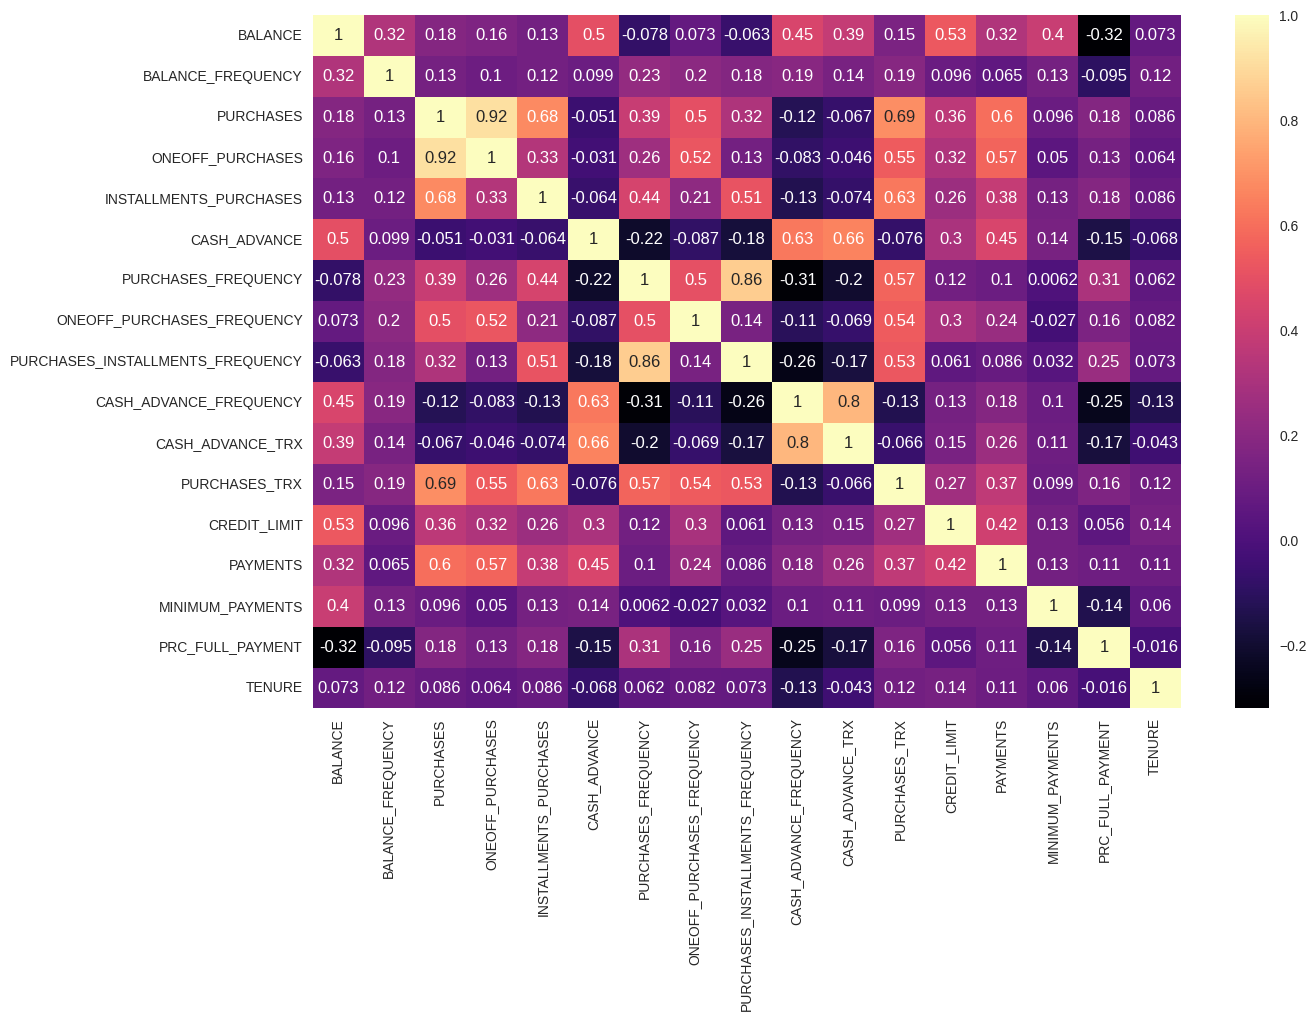

In [ ]:
#Visualisasi korelasi menggunakan heatmap
plt.figure(figsize=(14, 9))
sns.heatmap(df.corr(), annot=True, cmap='magma')
plt.show()

Dari output diatas dapat dilihat bahwa yang memiliki korelasi kuat terhadap atribut PURCHASES adalah ONEOFF_PURCHASE, PURCHASES_TRX, INSTALLMENTS_PURCHASES, PAYMENTS, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_FREQUENCY, CREDIT_LIMIT, PURCHASES_INSTALLMENTS_FREQUENCY. Sedangkan untuk atribut yang memiliki korelasi sedang terhadap PURCHASES adalah BALANCE, PRC_FULL_PAYMENT, BALANCE_FREQUENCY, MINIMUM_PAYMENTS, TENURE, CASH_ADVANCE, dan CASH_ADVANCE_TRX.

array([[<Axes: title={'center': 'BALANCE'}>,
        <Axes: title={'center': 'BALANCE_FREQUENCY'}>,
        <Axes: title={'center': 'PURCHASES'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES'}>],
       [<Axes: title={'center': 'INSTALLMENTS_PURCHASES'}>,
        <Axes: title={'center': 'CASH_ADVANCE'}>,
        <Axes: title={'center': 'PURCHASES_FREQUENCY'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<Axes: title={'center': 'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_TRX'}>,
        <Axes: title={'center': 'PURCHASES_TRX'}>],
       [<Axes: title={'center': 'CREDIT_LIMIT'}>,
        <Axes: title={'center': 'PAYMENTS'}>,
        <Axes: title={'center': 'MINIMUM_PAYMENTS'}>,
        <Axes: title={'center': 'PRC_FULL_PAYMENT'}>],
       [<Axes: title={'center': 'TENURE'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

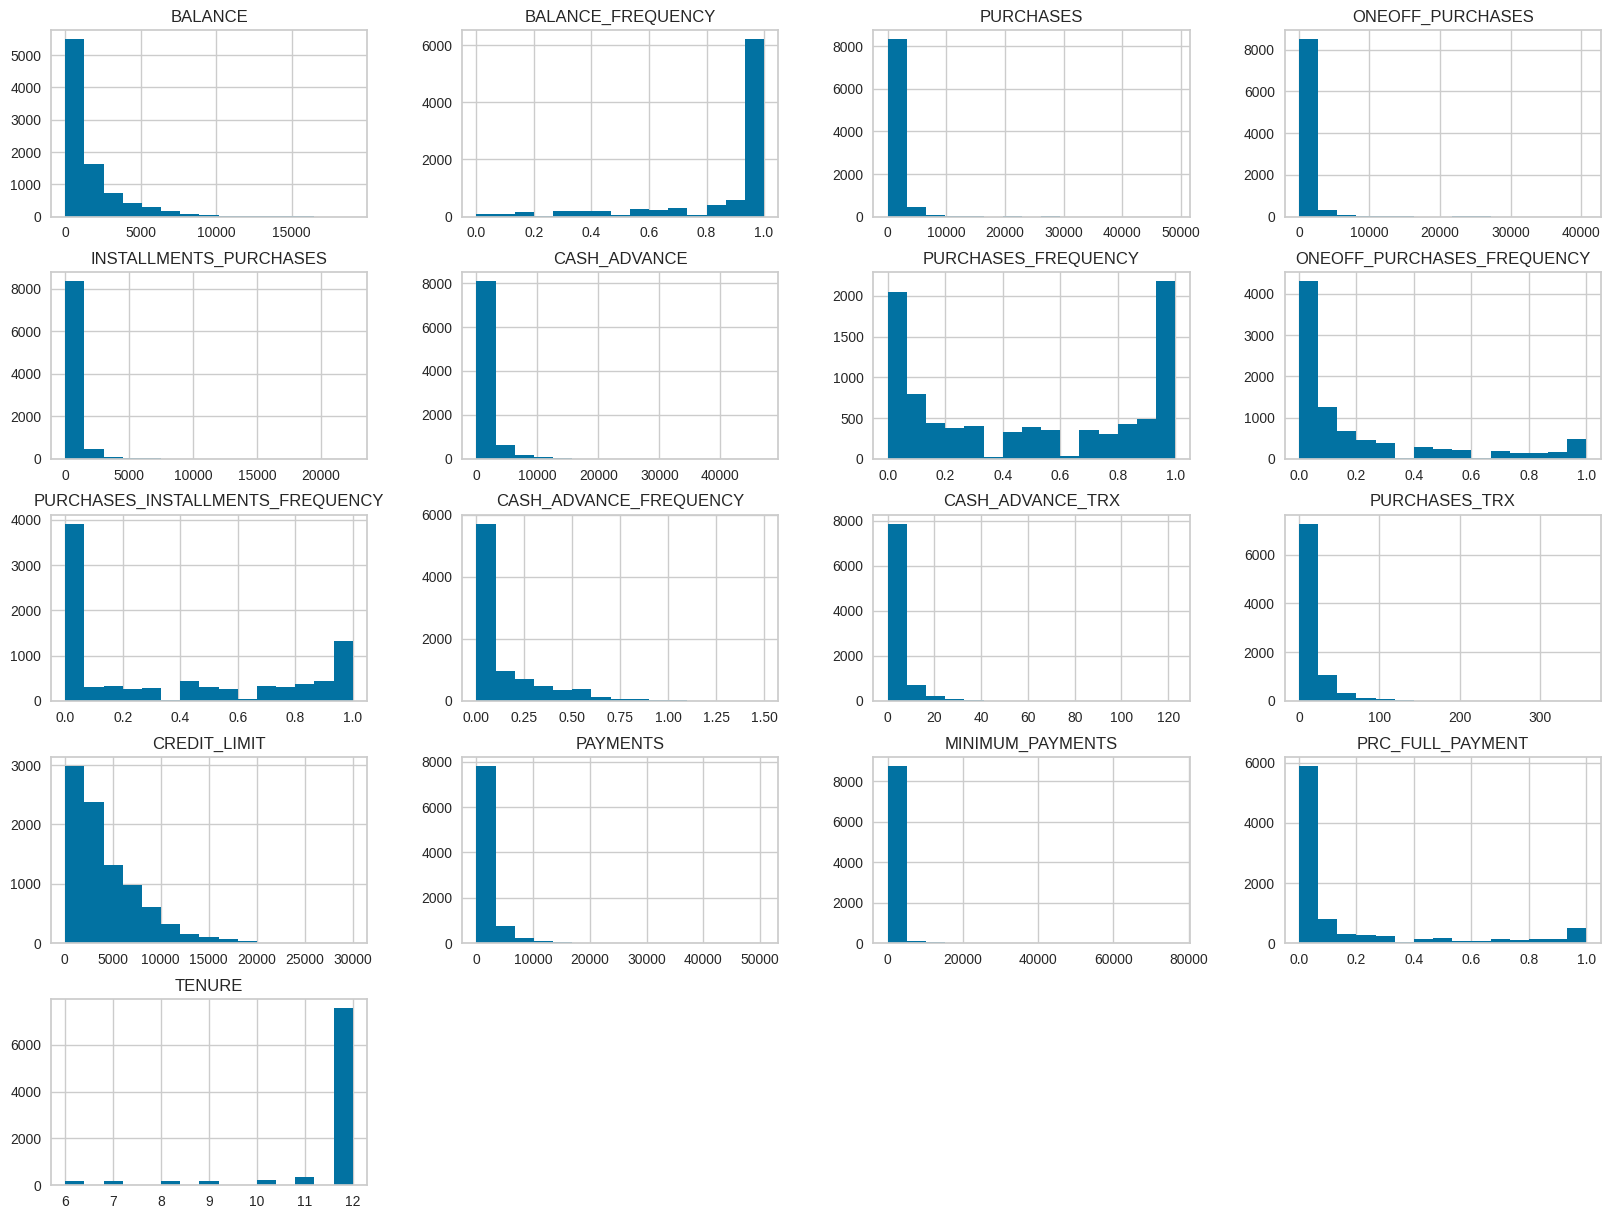

In [ ]:
#Visualisasi tiap atribut menggunakan histogram
num_col = df.columns
df[num_col].hist(bins=15, figsize=(20, 15), layout=(5, 4))

**Mencari Central Tendency**

In [ ]:
#Menghitung rata-rata BALANCE berdasarkan atribut BALANCE_FREQUENCY
df_mean = df.groupby('BALANCE_FREQUENCY')['BALANCE'].mean().sort_values(ascending=False)
df_mean.T

BALANCE_FREQUENCY
1.000000    2033.434871
0.900000    1861.278342
0.875000    1433.266756
0.625000    1427.223599
0.777778    1409.156758
0.888889    1325.466807
0.833333    1241.144050
0.857143    1107.645284
0.714286     991.768535
0.909091     841.747170
0.666667     794.484842
0.700000     715.181070
0.800000     651.762534
0.818182     584.769716
0.727273     562.382992
0.600000     549.126291
0.555556     471.399356
0.750000     445.612863
0.444444     444.431165
0.500000     354.036089
0.636364     292.617296
0.400000     250.945921
0.545455     246.049224
0.454545     187.559510
0.285714     173.246137
0.571429     164.896681
0.363636     149.958990
0.428571     148.776259
0.375000     134.373594
0.300000     116.524543
0.333333     103.607238
0.250000      95.861155
0.222222      89.112397
0.272727      76.450514
0.181818      52.411189
0.142857      44.606485
0.111111      38.743146
0.200000      31.877107
0.100000      25.141634
0.166667      20.676971
0.125000      20.10672

Dari output diatas, kita dapat melihat rata-rata saldo ('BALANCE') untuk setiap tingkat frekuensi pembaruan saldo ('BALANCE_FREQUENCY'). Dapat diliat bahwa jumlah rata-rata saldo yang dimiliki oleh pemegang kartu kredit yang sering diperbarui adalah sebesar 2033.434871. Dan pengguna kartu kredit yang tidak sering diperbarui memiliki rata rata saldo 0.0000.

In [ ]:
#Mengetahui batas kredit yang paling umum diberikan kepada pelanggan dengan masa berlaku kartu 12 bulan
df.loc[df['TENURE'] == 12, 'CREDIT_LIMIT'].mode()

0    3000.0
Name: CREDIT_LIMIT, dtype: float64

Dapat dilihat bahwa modus dari kolom 'CREDIT_LIMIT' untuk pemegang kartu kredit dengan masa berlaku layanan kartu kredit  12 bulan adalah sebesar 3000.0

In [ ]:
#Melihat nilai median dari atribut CASH_ADVANCE_FREQUENCY
median = df['CASH_ADVANCE_FREQUENCY'].median()
print(median)

0.0


**Mencari Variability**

In [ ]:
# Mencari variabilitas pada kolom 'MINIMUM_PAYMENTS'
variance = np.var(df['MINIMUM_PAYMENTS'])
std_dev = np.std(df['MINIMUM_PAYMENTS'])
z = df['MINIMUM_PAYMENTS']
z.skew()
percentile = np.percentile(z, [25, 50, 75])
jangkauan = np.ptp(z)

print("Variansi Atribut Minimum Payments:", variance)
print("Standar deviasi:", std_dev)
print("Skewness:", z.skew())
print("Percentile:", percentile)
print("Range:", jangkauan)

Variansi Atribut Minimum Payments: 5441311.98025328
Standar deviasi: 2332.6619944289573
Skewness: 13.852446498665346
Percentile: [170.85765425 312.343947   788.71350075]
Range: 76406.18835699999


Dari analisa variabilitas kolom 'MINIMUM_PAYMENTS' pada dataset, ditemukan nilai variansinya yang cukup besar sebesar 5441311.98025328 dan standar deviasi sebesar 2332.6619944289573. Lalu nilai Skewness sebesar 13.852446498665346, dimana semakin mendekati nol menunjukkan distribusi data yang relatif simetris. Hasil persentil menunjukkan penyebaran data di 25%, 50%, dan 75% yang pada output tersebut adalah 170.85765425, 312.343947, dan 788.71350075. Rentang Minimum Payments yang oleh pengguna pada dataset adalah 76406.18835699999, menunjukkan besar jangkauan nilai-nilai dalam data yang cukup besar.

---
##**Data Preprocessing**
---

In [ ]:
df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000        312.343947          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365          0.500000       6  
8946   275.861322        312.343947          0.000000       6  
8947    81

**Melakukan Normalisasi Data**<br>

Proses scaling data dilakukan menggunakan Standard Scaler. Penggunaan Standard Scaler tersebut ditujukan untuk mendapatkan hasil yang optimal.

In [ ]:
scaler = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)

In [ ]:
scaler.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   
2  0.447135           0.518084  -0.107668          0.108889   
3  0.049099          -1.016953   0.232058          0.546189   
4 -0.358775           0.518084  -0.462063         -0.347294   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576      2.605605            -1.221758   
2               -0.454576     -0.466786             1.269843   
3               -0.454576     -0.368653            -1.014125   
4               -0.454576     -0.466786            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678661                         -0.707313   
1                   -0.678661                         -0.916995   
2                    2.673451                         -0.916995   
3                   -0.399319                         -0.916995   
4                   -0.399319                         -0.916995   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.675349         -0.476070      -0.511333     -0.960378   
1                0.573963          0.110074      -0.591796      0.688678   
2               -0.675349         -0.476070      -0.109020      0.826100   
3               -0.258913         -0.329534      -0.551565      0.826100   
4               -0.675349         -0.476070      -0.551565     -0.905410   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT   TENURE  
0 -0.528979         -0.302400         -0.525551  0.36068  
1  0.818642          0.097500          0.234227  0.36068  
2 -0.383805         -0.093293         -0.525551  0.36068  
3 -0.598688         -0.228307         -0.525551  0.36068  
4 -0.364368         -0.257266         -0.525551  0.36068

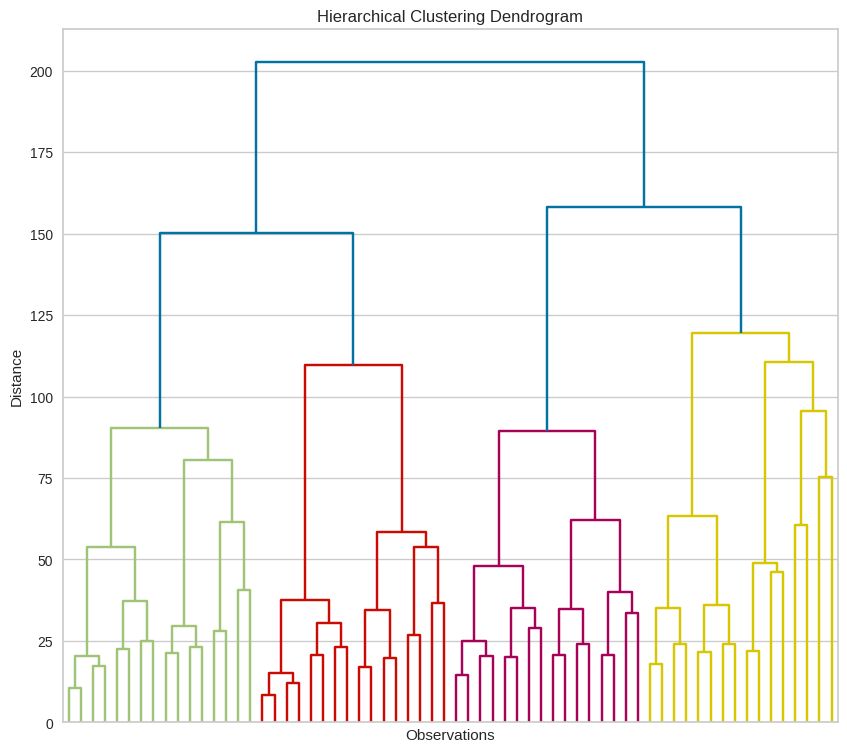

In [ ]:
hier_cluster = linkage(scaler, method='ward')

plt.figure(figsize=(10,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_cluster, truncate_mode='level', p = 5, show_leaf_counts=False, no_labels=True)
plt.show()

---
##**Pendefinisian Model**
---

**a. K-Means Model**
<br>
K-means adalah centroid-based algorithm, atau distance-based algorithm, dimana kita menghitung jarak untuk menetapkan titik ke sebuah cluster. Di K-Means, setiap cluster dikaitkan dengan centroid.

In [ ]:
KM_model = KMeans(n_clusters=4)

**b. PCA (Principal Component Analysis)**
<br>
model PCA dapat digunakan untuk mengekstraksi informasi dari ruang dimensi tinggi dengan memproyeksikannya ke dalam sub-ruang berdimensi lebih rendah. PCA mencoba untukmempertahankan bagian penting yang memiliki lebih banyak variasi data dan menghapus bagian yang tidak penting dengan variasi yang lebih sedikit. Sehingga kita dengan mudah melihat dan menafsirkan data ke dalam beberapa cluster.

In [ ]:
# PCA untuk dua Komponen Utama
pca_model = PCA()

---
##**Pelatihan Model**
---

**a. K-Means Clustering**

In [ ]:
kmeansCluster = KM_model.fit(scaler)
kmeansCluster

KMeans(n_clusters=4)

**b. PCA**

In [ ]:
principalComponents = pca_model.fit_transform(scaler)
principalComponents

array([[-1.68364879e+00, -1.07224148e+00,  4.75660084e-01, ...,
         1.49962336e-01,  4.82655442e-02, -1.60528758e-04],
       [-1.13408493e+00,  2.50914981e+00,  6.02216308e-01, ...,
        -5.32950936e-01, -8.29086834e-02,  3.07157686e-06],
       [ 9.69394988e-01, -3.83576903e-01,  9.09697616e-02, ...,
         2.21683158e-01,  5.11324941e-01,  2.23296494e-05],
       ...,
       [-9.28985122e-01, -1.80804835e+00, -4.58242377e-01, ...,
         4.60675887e-01,  1.57799814e-01, -1.63043472e-04],
       [-2.33784475e+00, -6.53611332e-01,  9.82831153e-01, ...,
         2.63789927e-01, -1.89595873e-01, -8.58602334e-05],
       [-5.58026533e-01, -4.00646098e-01,  1.03364560e+00, ...,
        -4.18806582e-01,  3.57426555e-01, -7.42947186e-05]])

---
##**Evaluasi Model**
---

**a. K-Means Clustering**

* Mengetahui jumlah clusters yang optimal dengan menggunakan elbow method

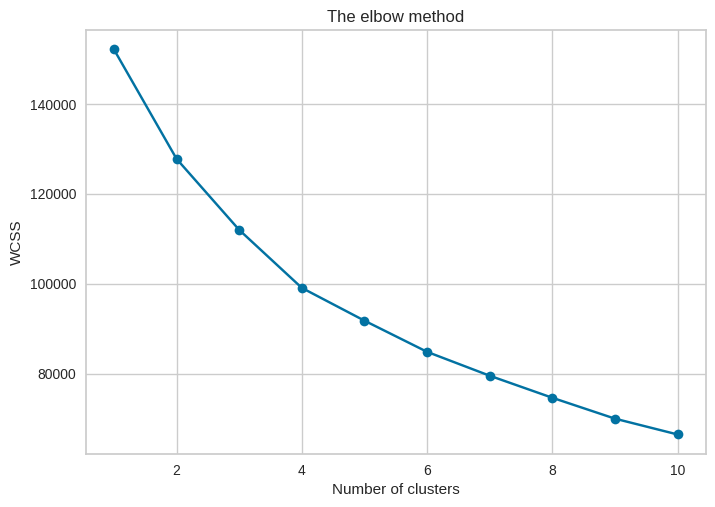

In [ ]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(scaler)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

* melatih k menas dengan cluster 4

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=3)
kmeans.fit(scaler)

KMeans(n_clusters=4, random_state=3)

* membuat dataframe kmeans_data dan menambahkan segmen kmeans.

In [ ]:
data_kmeans = df.copy()
data_kmeans['KMEANS_SEGMENT'] = kmeans.labels_

# Melihat transformasi data KMeans dengan melakukan groupby berdasarkan rata-rata KMeans segment
data_transf_kmeans = data_kmeans.groupby('KMEANS_SEGMENT').mean()
data_transf_kmeans

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
KMEANS_SEGMENT                                                                  
0               4602.449658           0.968389   501.862982        320.188797   
1               3551.153761           0.986879  7681.620098       5095.878826   
2               1012.658327           0.789924   270.041785        209.937299   
3                894.907458           0.934734  1236.178934        593.974874   

                INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
KMEANS_SEGMENT                                                              
0                           181.759123   4521.509581             0.287832   
1                          2587.208264    653.638891             0.946418   
2                            60.371441    596.509903             0.170145   
3                           642.478274    210.570626             0.885165   

                ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
KMEANS_SEGMENT                                                                 
0                                 0.138911                          0.185671   
1                                 0.739031                          0.788060   
2                                 0.086301                          0.080558   
3                                 0.297070                          0.711842   

                CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
KMEANS_SEGMENT                                                            
0                             0.484792         14.294904       7.665831   
1                             0.071290          2.085575      89.359413   
2                             0.114846          2.125471       2.903193   
3                             0.042573          0.790021      22.091773   

                CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
KMEANS_SEGMENT                                                                  
0                7546.160857  3484.054216       2003.674460          0.034888   
1                9696.943765  7288.739497       1972.767288          0.286707   
2                3278.640516   974.260054        553.900449          0.077981   
3                4213.207678  1332.194205        639.677258          0.269258   

                   TENURE  
KMEANS_SEGMENT             
0               11.386800  
1               11.951100  
2               11.446568  
3               11.594595

* memberikan nama pada segment kmeans

In [ ]:
data_transf_kmeans.rename({0:'Pengguna Level Tengah (Middle Ground)',
                           1:'Penggua dengan Pembelian Kredit Tinggi (High Credit Frequent Purchasers)',
                           2:'Pengguna dengan Penarikan Tunai Tinggi (High Cash Advance Users)',
                           3:'Pengguna Kredit Hemat (Frugal Credit Users)'})

BALANCE  \
KMEANS_SEGMENT                                                    
Pengguna Level Tengah (Middle Ground)               4602.449658   
Penggua dengan Pembelian Kredit Tinggi (High Cr...  3551.153761   
Pengguna dengan Penarikan Tunai Tinggi (High Ca...  1012.658327   
Pengguna Kredit Hemat (Frugal Credit Users)          894.907458   

                                                    BALANCE_FREQUENCY  \
KMEANS_SEGMENT                                                          
Pengguna Level Tengah (Middle Ground)                        0.968389   
Penggua dengan Pembelian Kredit Tinggi (High Cr...           0.986879   
Pengguna dengan Penarikan Tunai Tinggi (High Ca...           0.789924   
Pengguna Kredit Hemat (Frugal Credit Users)                  0.934734   

                                                      PURCHASES  \
KMEANS_SEGMENT                                                    
Pengguna Level Tengah (Middle Ground)                501.862982   
Penggua dengan Pembelian Kredit Tinggi (High Cr...  7681.620098   
Pengguna dengan Penarikan Tunai Tinggi (High Ca...   270.041785   
Pengguna Kredit Hemat (Frugal Credit Users)         1236.178934   

                                                    ONEOFF_PURCHASES  \
KMEANS_SEGMENT                                                         
Pengguna Level Tengah (Middle Ground)                     320.188797   
Penggua dengan Pembelian Kredit Tinggi (High Cr...       5095.878826   
Pengguna dengan Penarikan Tunai Tinggi (High Ca...        209.937299   
Pengguna Kredit Hemat (Frugal Credit Users)               593.974874   

                                                    INSTALLMENTS_PURCHASES  \
KMEANS_SEGMENT                                                               
Pengguna Level Tengah (Middle Ground)                           181.759123   
Penggua dengan Pembelian Kredit Tinggi (High Cr...             2587.208264   
Pengguna dengan Penarikan Tunai Tinggi (High Ca...               60.371441   
Pengguna Kredit Hemat (Frugal Credit Users)                     642.478274   

                                                    CASH_ADVANCE  \
KMEANS_SEGMENT                                                     
Pengguna Level Tengah (Middle Ground)                4521.509581   
Penggua dengan Pembelian Kredit Tinggi (High Cr...    653.638891   
Pengguna dengan Penarikan Tunai Tinggi (High Ca...    596.509903   
Pengguna Kredit Hemat (Frugal Credit Users)           210.570626   

                                                    PURCHASES_FREQUENCY  \
KMEANS_SEGMENT                                                            
Pengguna Level Tengah (Middle Ground)                          0.287832   
Penggua dengan Pembelian Kredit Tinggi (High Cr...             0.946418   
Pengguna dengan Penarikan Tunai Tinggi (High Ca...             0.170145   
Pengguna Kredit Hemat (Frugal Credit Users)                    0.885165   

                                                    ONEOFF_PURCHASES_FREQUENCY  \
KMEANS_SEGMENT                                                                   
Pengguna Level Tengah (Middle Ground)                                 0.138911   
Penggua dengan Pembelian Kredit Tinggi (High Cr...                    0.739031   
Pengguna dengan Penarikan Tunai Tinggi (High Ca...                    0.086301   
Pengguna Kredit Hemat (Frugal Credit Users)                           0.297070   

                                                    PURCHASES_INSTALLMENTS_FREQUENCY  \
KMEANS_SEGMENT                                                                         
Pengguna Level Tengah (Middle Ground)                                       0.185671   
Penggua dengan Pembelian Kredit Tinggi (High Cr...                          0.788060   
Pengguna dengan Penarikan Tunai Tinggi (High Ca...                          0.080558   
Pengguna Kredit Hemat (Frugal Credit Users)                                 0.711842   

                           

* memasukan label kmeans segments pada dataframe data_kmeans

In [ ]:
data_kmeans['LABELS'] = data_kmeans['KMEANS_SEGMENT'].map({0:'Pengguna Level Tengah (Middle Ground)',
                                                           1:'Pengguna dengan Kredit Pembelian Tinggi (High Credit Frequent Purchasers)',
                                                           2:'Pengguna dengan Penarikan Tunai Tinggi (High Cash Advance Users)',
                                                           3:'Pengguna Kredit Hemat (Frugal Credit Users)'})

data_kmeans.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  KMEANS_SEGMENT  \
0   201.802084        139.509787          0.000000      12               2   
1  4103.032597       1072.340217          0.222222      12               0   
2   622.066742        627.284787          0.000000      12               3   
3     0.000000        312.343947          0.000000      12               2   
4   678.334763        244.791237          0.000000      12               2   

                                              LABELS  
0  Pengguna dengan Penarikan Tunai Tinggi (High C...  
1              Pengguna Level Tengah (Middle Ground)  
2        Pengguna Kredit Hemat (Frugal Credit Users)  
3  Pengguna dengan Penarikan Tunai Tinggi (High C...  
4  Pengguna dengan Penarikan Tunai Tinggi (High C...

**Analisa K-Means**

*Transaksi Pembelian vs Pembelian*

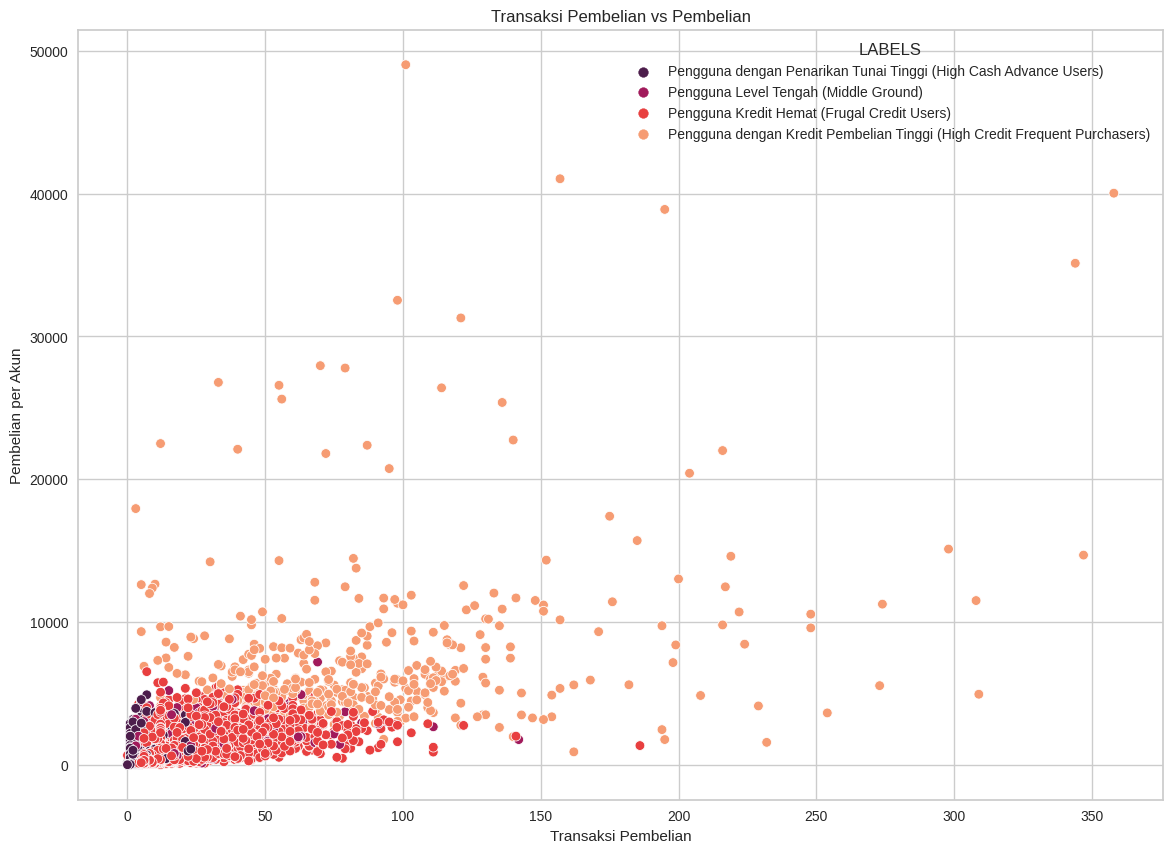

<Figure size 800x550 with 0 Axes>

In [ ]:
#sekarang kita dapat mengilustrasikan grup berdasarkan beberapa fitur dalam scatterplot

plt.figure(figsize=(14,10))
X = data_kmeans['PURCHASES_TRX']
Y = data_kmeans['PURCHASES']
g = sns.scatterplot(x=X, y=Y, hue = data_kmeans['LABELS'], palette = 'rocket')
g.set_xlabel('Transaksi Pembelian')
g.set_ylabel('Pembelian per Akun')
g.set_title('Transaksi Pembelian vs Pembelian')
plt.show()

plt.savefig("Transaksi Pembelian vs Pembelian KMeans.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

Dari grafik terlihat dari 4 cluster, cluster Pengguna dengan kredit pembelian tinggi terdapat transaksi pembelian sampai melebihi 350 dan pembelian per akun melebihi 40000. Sedangkan untuk ketiga cluster lainnya pembelian per akun hanya kurang dari 10000

*Saldo Akun vs Pembelian*

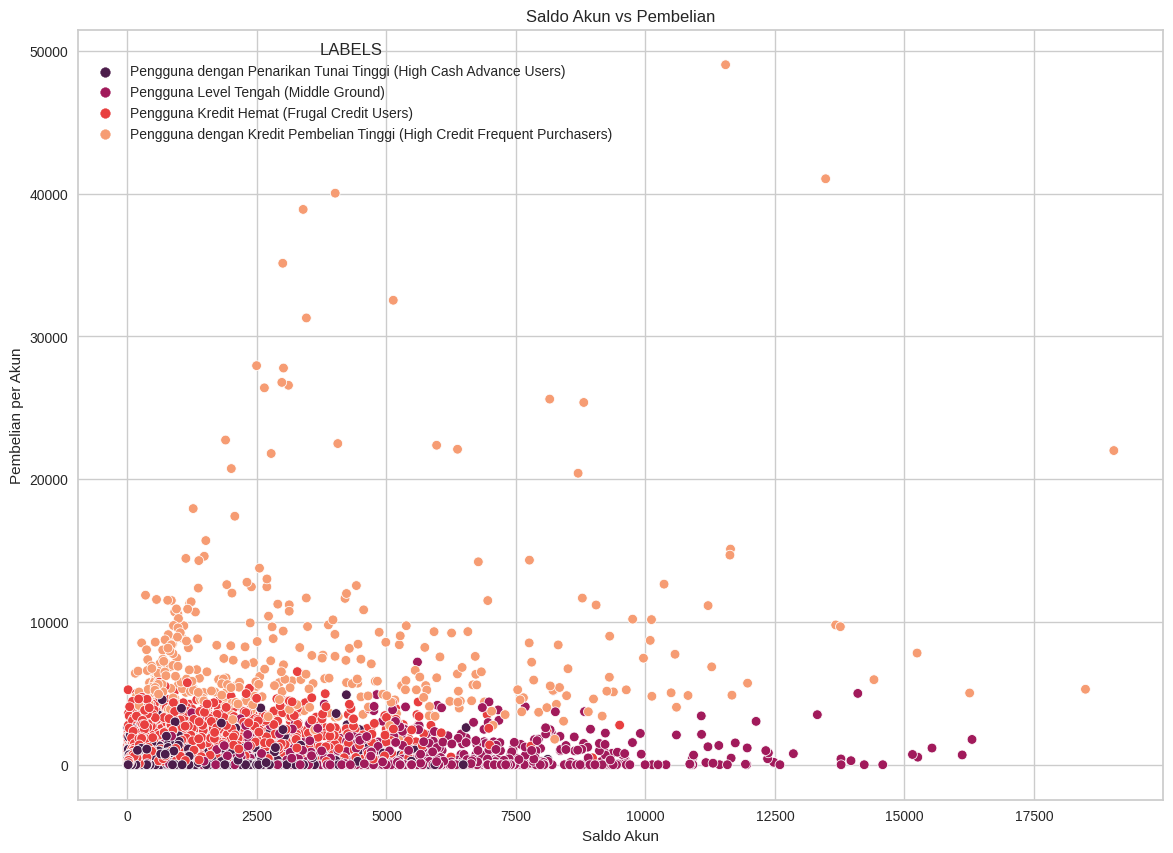

<Figure size 800x550 with 0 Axes>

In [ ]:
plt.figure(figsize=(14,10))
X = data_kmeans['BALANCE']
Y = data_kmeans['PURCHASES']
g = sns.scatterplot(x=X, y=Y, hue = data_kmeans['LABELS'], palette = 'rocket')
g.set_xlabel('Saldo Akun')
g.set_ylabel('Pembelian per Akun')
g.set_title('Saldo Akun vs Pembelian')
plt.show()

plt.savefig("Saldo Akun vs Pembelian KMeans.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

Dari grafik terlihat bahwa cluster Pengguna Level tengah dan cluster pengguna dengan kredit pembelian tinggi memiliki saldo yang besar, namun perbedaannya terlihat pada pembelian per akun. cluster Pengguna Level tengah terlihat tidak banyak melakukan pembelian berbeda dengan luster pengguna dengan kredit pembelian tinggi yang banyak melakukan pembelian

*Tingkat Frekuensi Pembelian vs Transaksi Pembelian*

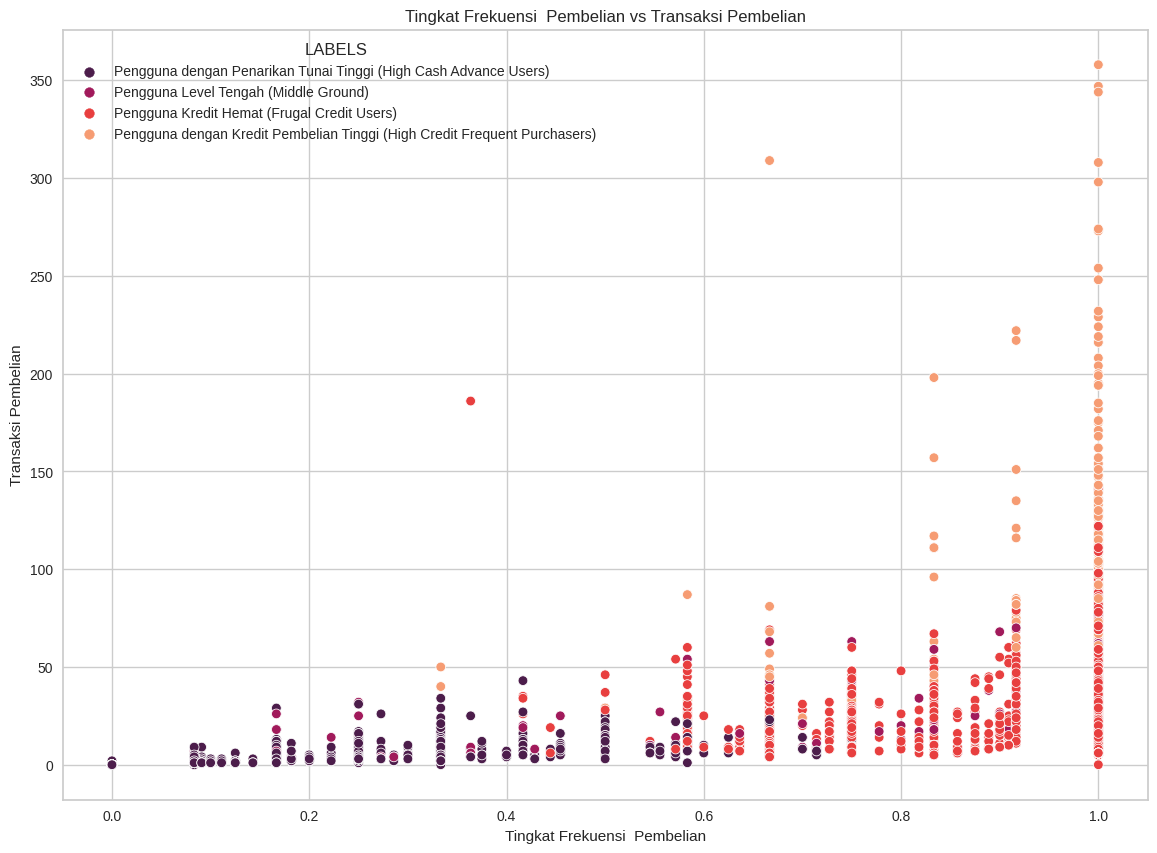

<Figure size 800x550 with 0 Axes>

In [ ]:
plt.figure(figsize=(14,10))
X = data_kmeans['PURCHASES_FREQUENCY']
Y = data_kmeans['PURCHASES_TRX']
g = sns.scatterplot(x=X, y=Y, hue = data_kmeans['LABELS'], palette = 'rocket')
g.set_xlabel('Tingkat Frekuensi  Pembelian')
g.set_ylabel('Transaksi Pembelian')
g.set_title('Tingkat Frekuensi  Pembelian vs Transaksi Pembelian')
plt.show()

plt.savefig("Tingkat Frekuensi  Pembelian vs Transaksi Pembelian KMeans.png")

Dari grafik terlihat bahwa cluster Pengguna dengan penarikan tunai tinggi dan cluster Pengguna level tengah rata-rata memiliki tingkat frekuensi pembelian mulai dari 0.0 sampai kurang lebih 0.7 dengan transaksi pembelian kurang dari 100.

Sedangkan cluster Pengguna kredit hemat dan cluster Pengguna dengan kredit pembelian tinggi rata-rata memiliki tingkat frekuensi pembelian mulai dari 0.3 sampai dengan 1..0 dengan banyaknya transaksi pembelian bisa mencapai lebih dari 100

*Batas Kredit Akun vs Pembelian per Akun*

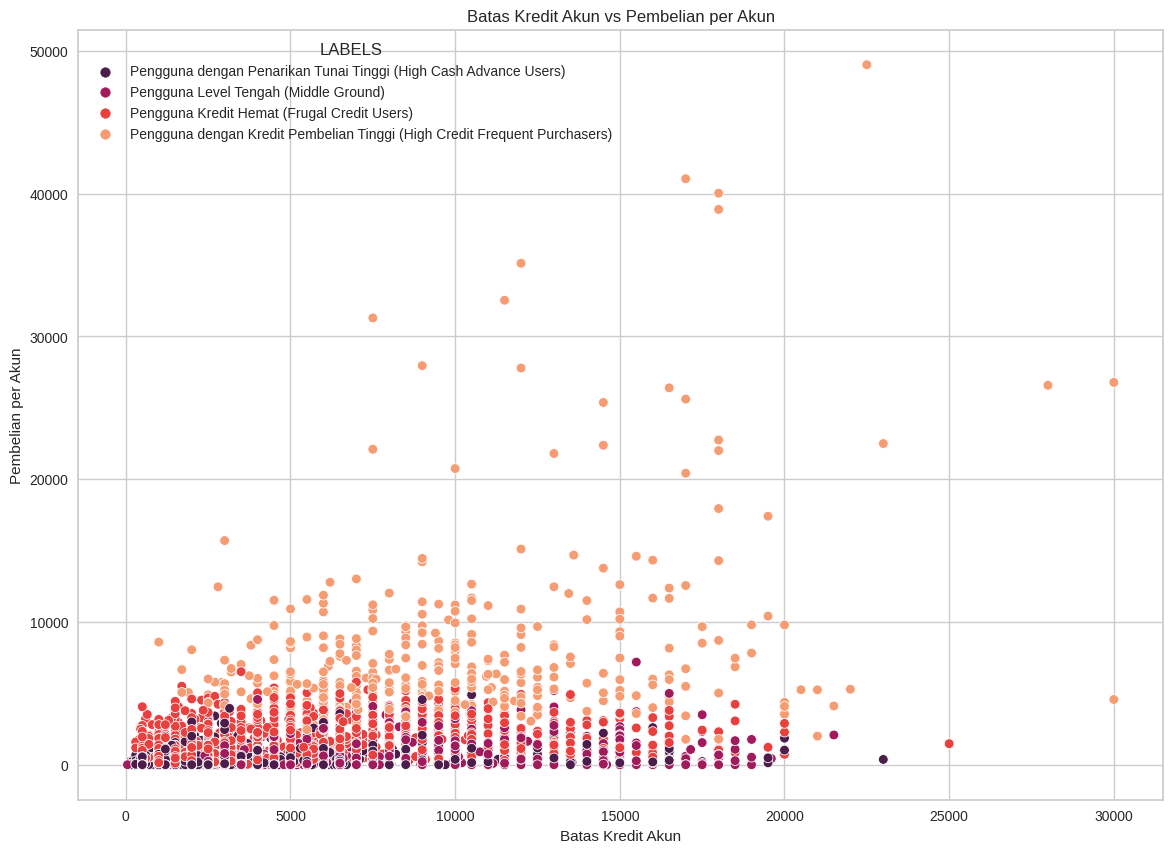

<Figure size 800x550 with 0 Axes>

In [ ]:
plt.figure(figsize=(14,10))
X = data_kmeans['CREDIT_LIMIT']
Y = data_kmeans['PURCHASES']
g = sns.scatterplot(x=X, y=Y, hue = data_kmeans['LABELS'], palette = 'rocket')
g.set_xlabel('Batas Kredit Akun')
g.set_ylabel('Pembelian per Akun')
g.set_title('Batas Kredit Akun vs Pembelian per Akun')
plt.show()

plt.savefig("Batas Kredit Akun vs Pembelian per Akun KMeans.png",
            bbox_inches ="tight",
            pad_inches = 1,
            orientation ='landscape')

Dari grafik terlihat bahwa rata-rata cluster memiliki batas kredit akun kurang lebih 20000 serta terdapat beberapa yang lebih. Namun cluster Pengguna dengan kredit pembelian tinggi dengan batas kredit tersebut tetap melakukan banyak pembelian melebihi 10000 bahkan terdapat beberapa yang melebihi 30000

**b. PCA (Principal Component Analysis)**

* Melihat nilai variance ratio dari pca

In [ ]:
pca_model.explained_variance_ratio_

array([2.72976713e-01, 2.03137796e-01, 8.81318170e-02, 7.47952439e-02,
       6.22472925e-02, 5.74005645e-02, 4.88342555e-02, 4.29920325e-02,
       3.79825870e-02, 3.08000227e-02, 2.37225104e-02, 1.77336964e-02,
       1.42785685e-02, 1.21691956e-02, 1.01266703e-02, 2.67034839e-03,
       6.85226796e-07])

* Visualisai PCA untuk melihat nilai dari components beserta besarnya variance yang ditangkap

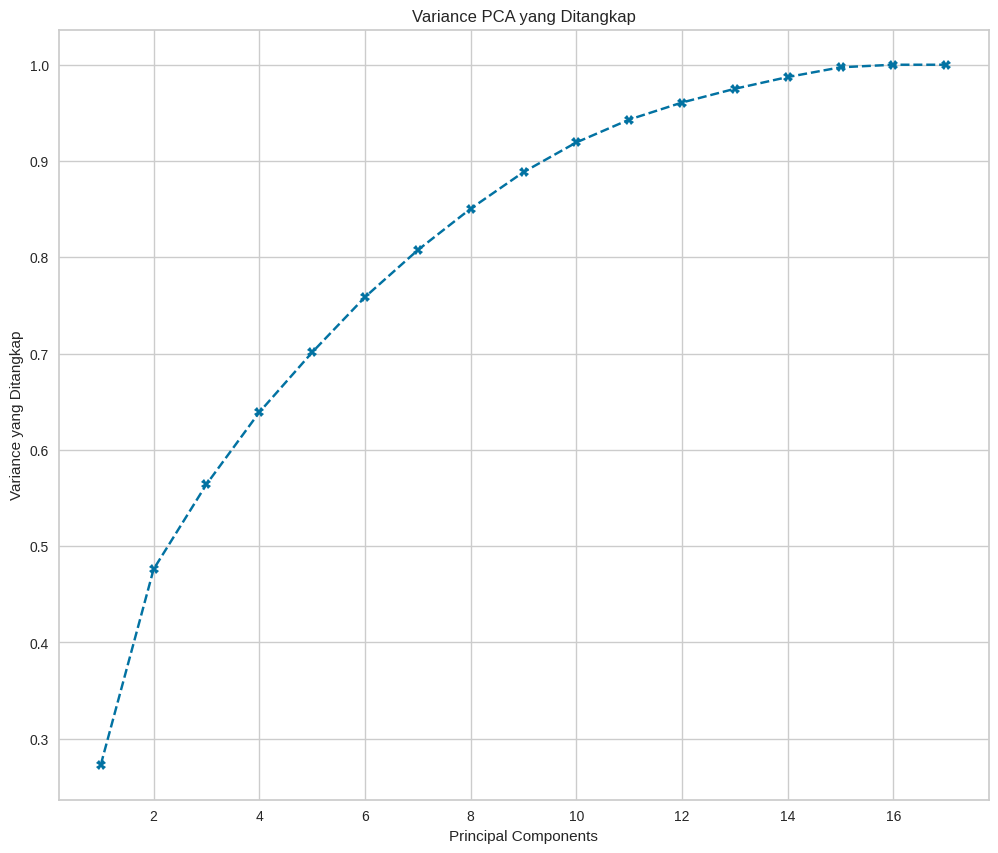

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(range(1, 18), pca_model.explained_variance_ratio_.cumsum(), marker='X', linestyle='--', )
plt.title('Variance PCA yang Ditangkap')
plt.xlabel('Principal Components')
plt.ylabel('Variance yang Ditangkap')
plt.show()

Dari visualisasi terlihat cukup banyak komponen, dan tidak seperti algoritma KMeans yang terdapat crystalized cutoff. Kemudian kami mengatur nilai standar pada variance 80% dengan menggaunakan 7 componets

* Menjalankan ulang PCA dengan nilai principal components yang sudah dipilih

In [ ]:
pca = PCA(n_components=7, random_state = 42)
pca.fit(scaler)
pca.components_

array([[ 0.10173497,  0.12049041,  0.4115624 ,  0.34633416,  0.33676092,
        -0.02280988,  0.32123217,  0.29449254,  0.27449428, -0.08858206,
        -0.04813551,  0.39059872,  0.21191634,  0.26648154,  0.06326867,
         0.13183285,  0.0810856 ],
       [ 0.40381873,  0.13134414,  0.04002462,  0.06191772, -0.01917539,
         0.43902651, -0.19114801, -0.01856091, -0.17886875,  0.43412117,
         0.41964355, -0.02016821,  0.23802849,  0.25671565,  0.16906581,
        -0.19006529, -0.00425524],
       [-0.16163198, -0.42299545,  0.25747423,  0.39089919, -0.10926846,
        -0.02312809, -0.37139443,  0.11556486, -0.46957883, -0.10470904,
        -0.11034514, -0.07592937,  0.10068174,  0.27735866, -0.23451664,
         0.12647724, -0.06798872],
       [ 0.27931641,  0.15576173,  0.04162083,  0.08507909, -0.05791521,
        -0.25659565, -0.19456427,  0.03427937, -0.22528752, -0.26462842,
        -0.32838559, -0.0207944 ,  0.13153307, -0.11214809,  0.39256028,
        -0.41957367

* membuat DataFrame yang akan memiliki nilai principal component untuk semua sampel.

In [ ]:
pca_df = pd.DataFrame(data = pca.components_, columns = df.columns.values,
                      index = ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7'])
pca_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
PCA1  0.101735           0.120490   0.411562          0.346334   
PCA2  0.403819           0.131344   0.040025          0.061918   
PCA3 -0.161632          -0.422995   0.257474          0.390899   
PCA4  0.279316           0.155762   0.041621          0.085079   
PCA5  0.051022          -0.476836   0.027887         -0.160839   
PCA6  0.042752           0.022045   0.180453          0.179984   
PCA7 -0.254182           0.100801   0.200220          0.120685   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
PCA1                0.336761     -0.022810             0.321232   
PCA2               -0.019175      0.439027            -0.191148   
PCA3               -0.109268     -0.023128            -0.371394   
PCA4               -0.057915     -0.256596            -0.194564   
PCA5                0.361402      0.097560            -0.099667   
PCA6                0.096003     -0.145018            -0.046867   
PCA7                0.251771     -0.048730            -0.150818   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
PCA1                    0.294493                          0.274494   
PCA2                   -0.018561                         -0.178869   
PCA3                    0.115565                         -0.469579   
PCA4                    0.034279                         -0.225288   
PCA5                   -0.540330                          0.176996   
PCA6                   -0.003524                         -0.048051   
PCA7                   -0.281432                          0.038003   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
PCA1               -0.088582         -0.048136       0.390599      0.211916   
PCA2                0.434121          0.419644      -0.020168      0.238028   
PCA3               -0.104709         -0.110345      -0.075929      0.100682   
PCA4               -0.264628         -0.328386      -0.020794      0.131533   
PCA5               -0.145160         -0.083884      -0.036237      0.086303   
PCA6                0.058183         -0.064631       0.100930     -0.320143   
PCA7                0.144220          0.198738       0.109343     -0.557414   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
PCA1  0.266482          0.063269          0.131833  0.081086  
PCA2  0.256716          0.169066         -0.190065 -0.004255  
PCA3  0.277359         -0.234517          0.126477 -0.067989  
PCA4 -0.112148          0.392560         -0.419574  0.437548  
PCA5  0.200851          0.415045          0.143363 -0.001838  
PCA6 -0.116040          0.290166         -0.352643 -0.745456  
PCA7  0.156826         -0.200462         -0.300495  0.404204

* Score PCA dari transform data yang sudah di scaled

In [ ]:
pca_scores = pca.transform(scaler)
pca_scores

array([[-1.68364879, -1.07224148,  0.47566008, ...,  0.04319508,
         0.06806942,  0.82215526],
       [-1.13408493,  2.50914981,  0.60221631, ...,  0.66263777,
        -1.10225463, -0.38428208],
       [ 0.96939499, -0.3835769 ,  0.09096976, ..., -2.16658421,
        -0.32018501, -1.54249644],
       ...,
       [-0.92898512, -1.80804835, -0.45824238, ...,  0.23461525,
         2.98078368, -1.4032653 ],
       [-2.33784475, -0.65361133,  0.98283115, ..., -0.0702759 ,
         3.17948406, -0.97353358],
       [-0.55802653, -0.4006461 ,  1.0336456 , ..., -1.44034346,
         3.67556151, -1.4192505 ]])

* Melakukan clustering ulang pada data component PCA yang sudah diubah dengan menggunakan KMeans

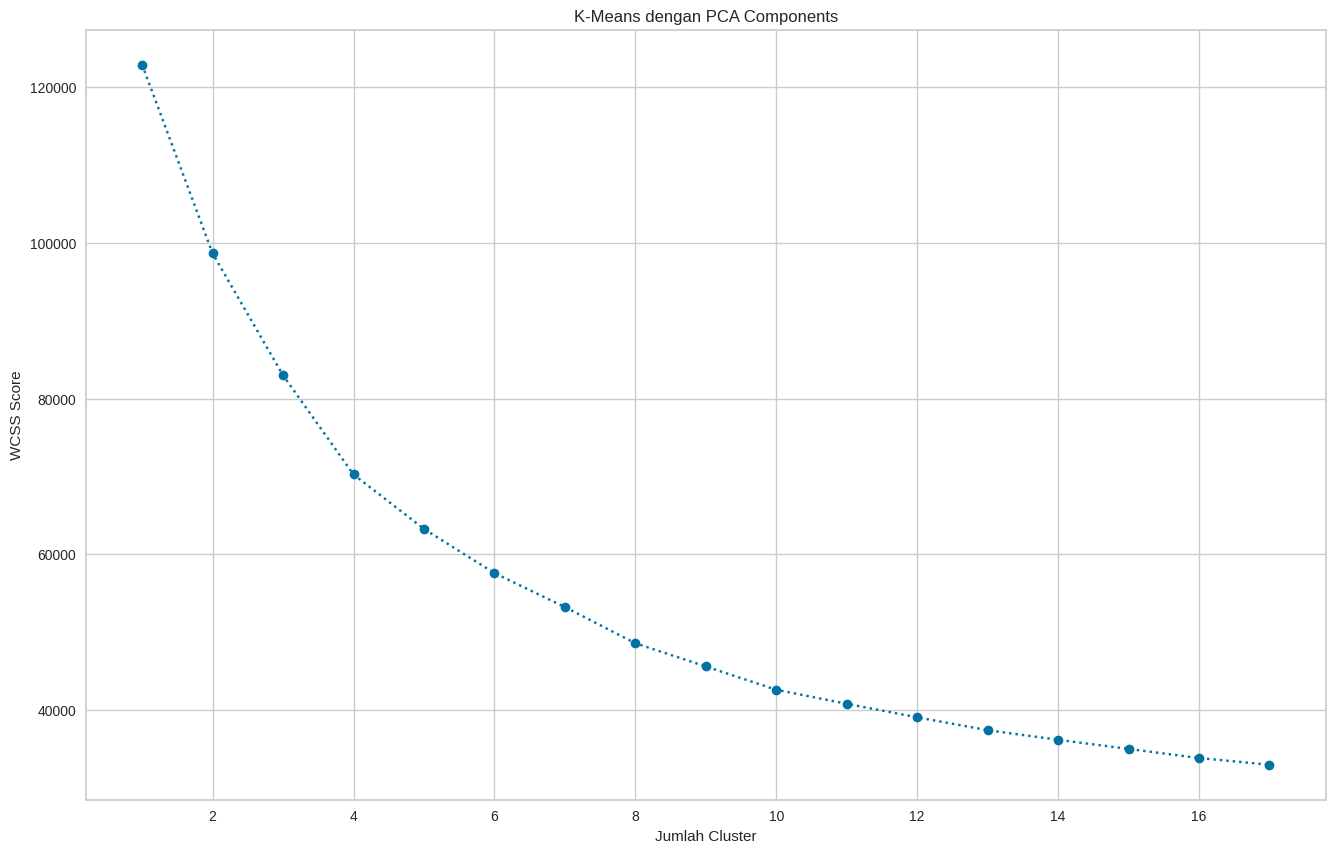

In [ ]:
wcss = []
for i in range(1, 18):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++')
    kmeans_pca.fit(pca_scores)
    wcss.append(kmeans_pca.inertia_)

plt.figure(figsize=(16,10))
plt.plot(range(1, 18), wcss, marker='o', linestyle='dotted')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS Score')
plt.title('K-Means dengan PCA Components')
plt.show()

Berdasarkan visualisasi didapatkan jumlah cluster dimulai dari 4 dan seterusnya memiliki nilai atau jarak yang optimal. Kami memilih nilai cluster sebanyak 4 dengan memperhatikan computation cost sambil menentukan jumlah cluster. Jika kita menambah jumlah cluster, maka computation cost juga akan meningkat. Jadi, jika kita tidak memiliki sumber daya komputasi yang tinggi, disarankan untuk memilih jumlah cluster yang lebih sedikit.

* Melatih model untuk Kmeans PCA dengan n_cluster sebanyak 4

In [ ]:
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_pca.fit(pca_scores)

KMeans(n_clusters=4, random_state=42)

* Menamabahkan nilai segment KMeans PCA dan nilai component pada dataframe pca_kmeans dengan membuat kolom baru

In [ ]:
pca_kmeans = pd.concat([df.reset_index(drop=True), pd.DataFrame(pca_scores)], axis=1)
pca_kmeans.columns.values[-7:] = ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7']

pca_kmeans['KMEANS_PCA_SEGMENT'] = kmeans_pca.labels_
pca_kmeans

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE      PCA1  \
0      201.802084        139.509787          0.000000      12 -1.683649   
1     4103.032597       1072.340217          0.222222      12 -1.134085   
2      622.066742        627.284787          0.000000      12  0.969395   
3        0.000000        312.343947          0.000000      12 -0.888220   
4      678.334763        244.791237          0.000000      12 -1.600021   
...           ...               ...               ...     ...       ...   
8945   325.594462         48.886365          0.500000       6

Sekarang dataframe pca_kmeans memiliki original features, jumlah PCA Component tetap, dan kolom label segmen yang sesuai dengan clustering KMeans yang diterapkan ke jumlah grup yang tetap

* Melakukan grouping berdasarkan segmennya dan melihat mean dari semua feaures dan PCA Components

In [ ]:
pca_kmeans_freq = pca_kmeans.groupby(['KMEANS_PCA_SEGMENT']).mean()
pca_kmeans_freq

BALANCE  BALANCE_FREQUENCY    PURCHASES  \
KMEANS_PCA_SEGMENT                                                
0                    997.185640           0.788455   277.303846   
1                    941.673966           0.940034  1313.785955   
2                   4561.536308           0.968393   484.558963   
3                   3783.301905           0.986106  8507.860776   

                    ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
KMEANS_PCA_SEGMENT                                                           
0                         212.843294               64.797720    575.005205   
1                         639.477174              674.494366    211.463240   
2                         306.170156              178.472486   4498.028573   
3                        5730.311493             2779.340328    788.274440   

                    PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
KMEANS_PCA_SEGMENT                                                    
0                              0.180152                    0.087680   
1                              0.892354                    0.310055   
2                              0.282127                    0.135138   
3                              0.943786                    0.748299   

                    PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
KMEANS_PCA_SEGMENT                                                             
0                                           0.088775                0.112338   
1                                           0.719547                0.042847   
2                                           0.182097                0.481553   
3                                           0.779055                0.080570   

                    CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
KMEANS_PCA_SEGMENT                                                  
0                           2.064684       3.047088   3257.002065   
1                           0.797623      23.552155   4344.270506   
2                          14.182716       7.453498   7493.213618   
3                           2.477612      92.683582  10027.164179   

                       PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
KMEANS_PCA_SEGMENT                                                    
0                    965.023182        560.770922          0.078348   
1                   1388.262543        643.907252          0.273324   
2                   3460.123876       1974.461431          0.035695   
3                   8185.716327       2189.511492          0.288089   

                       TENURE      PCA1      PCA2      PCA3      PCA4  \
KMEANS_PCA_SEGMENT                                                      
0                   11.438662 -1.322516 -0.218583  0.599202  0.313429   
1                   11.614562  1.061781 -1.093821 -0.697753 -0.273701   
2                   11.387654 -0.492024  3.476758 -0.399478 -0.401468   
3                   11.958209  7.048560  1.010246  1.240364  0.430160   

                        PCA5      PCA6      PCA7  
KMEANS_PCA_SEGMENT                                
0                   0.075229  0.135908  0.171128  
1                  -0.129658 -0.149807 -0.163098  
2                   0.033372 -0.236072 -0.263570  
3                   0.275235  0.724000  0.533016

* Melihat Perolehan jumlah observasi (pengamatan) dan proporsi observasi (pengamatan) dalam setiap segmen

In [ ]:
pca_kmeans_freq['NUMBER_OF_OBSERVATIONS'] = pca_kmeans[['KMEANS_PCA_SEGMENT', 'BALANCE']].groupby(['KMEANS_PCA_SEGMENT']).count()
pca_kmeans_freq['OBSERVATIONAL_PROPORTIUONS'] = pca_kmeans_freq['NUMBER_OF_OBSERVATIONS'] / pca_kmeans_freq['NUMBER_OF_OBSERVATIONS'].sum()
pca_kmeans_freq = pca_kmeans_freq.rename({0:'Pengguna Level Tengah',
                                          1:'Pengguna dengan Penarikan Tunai Tinggi',
                                          2:'Pengguna Kredit Hemat',
                                          3:'Penggnua dengan Pembelian Kredit Tinggi'})
pca_kmeans_freq

BALANCE  BALANCE_FREQUENCY  \
KMEANS_PCA_SEGMENT                                                        
Pengguna Level Tengah                     997.185640           0.788455   
Pengguna dengan Penarikan Tunai Tinggi    941.673966           0.940034   
Pengguna Kredit Hemat                    4561.536308           0.968393   
Penggnua dengan Pembelian Kredit Tinggi  3783.301905           0.986106   

                                           PURCHASES  ONEOFF_PURCHASES  \
KMEANS_PCA_SEGMENT                                                       
Pengguna Level Tengah                     277.303846        212.843294   
Pengguna dengan Penarikan Tunai Tinggi   1313.785955        639.477174   
Pengguna Kredit Hemat                     484.558963        306.170156   
Penggnua dengan Pembelian Kredit Tinggi  8507.860776       5730.311493   

                                         INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
KMEANS_PCA_SEGMENT                                                              
Pengguna Level Tengah                                 64.797720    575.005205   
Pengguna dengan Penarikan Tunai Tinggi               674.494366    211.463240   
Pengguna Kredit Hemat                                178.472486   4498.028573   
Penggnua dengan Pembelian Kredit Tinggi             2779.340328    788.274440   

                                         PURCHASES_FREQUENCY  \
KMEANS_PCA_SEGMENT                                             
Pengguna Level Tengah                               0.180152   
Pengguna dengan Penarikan Tunai Tinggi              0.892354   
Pengguna Kredit Hemat                               0.282127   
Penggnua dengan Pembelian Kredit Tinggi             0.943786   

                                         ONEOFF_PURCHASES_FREQUENCY  \
KMEANS_PCA_SEGMENT                                                    
Pengguna Level Tengah                                      0.087680   
Pengguna dengan Penarikan Tunai Tinggi                     0.310055   
Pengguna Kredit Hemat                                      0.135138   
Penggnua dengan Pembelian Kredit Tinggi                    0.748299   

                                         PURCHASES_INSTALLMENTS_FREQUENCY  \
KMEANS_PCA_SEGMENT                                                          
Pengguna Level Tengah                                            0.088775   
Pengguna dengan Penarikan Tunai Tinggi                           0.719547   
Pengguna Kredit Hemat                                            0.182097   
Penggnua dengan Pembelian Kredit Tinggi                          0.779055   

                                         CASH_ADVANCE_FREQUENCY  \
KMEANS_PCA_SEGMENT                                                
Pengguna Level Tengah                                  0.112338   
Pengguna dengan Penarikan Tunai Tinggi                 0.042847   
Pengguna Kredit Hemat                                  0.481553   
Penggnua dengan Pembelian Kredit Tinggi                0.080570   

                                         CASH_ADVANCE_TRX  PURCHASES_TRX  \
KMEANS_PCA_SEGMENT                                                         
Pengguna Level Tengah                            2.064684       3.047088   
Pengguna dengan Penarikan Tunai Tinggi           0.797623      23.552155   
Pengguna Kredit Hemat                           14.182716       7.453498   
Penggnua dengan Pembelian Kredit Tinggi          2.477612      92.683582   

                                         CREDIT_LIMIT     PAYMENTS  \
KMEANS_PCA_SEGMENT                                                   
Pengguna Level Tengah                     3257.002065   965.023182   
Pengguna dengan Penarikan Tunai Tinggi    4344.270506  1388.262543   
Pengguna Kredit Hemat                     7493.213618  3460.123876   
Penggnua dengan Pembelian Kredit Tinggi  10027.164179  8185.716327   

                                         MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
KMEANS_PCA_SEGMENT         

* Visualisasi Jumlah Observasi (Pengamatan) per segment

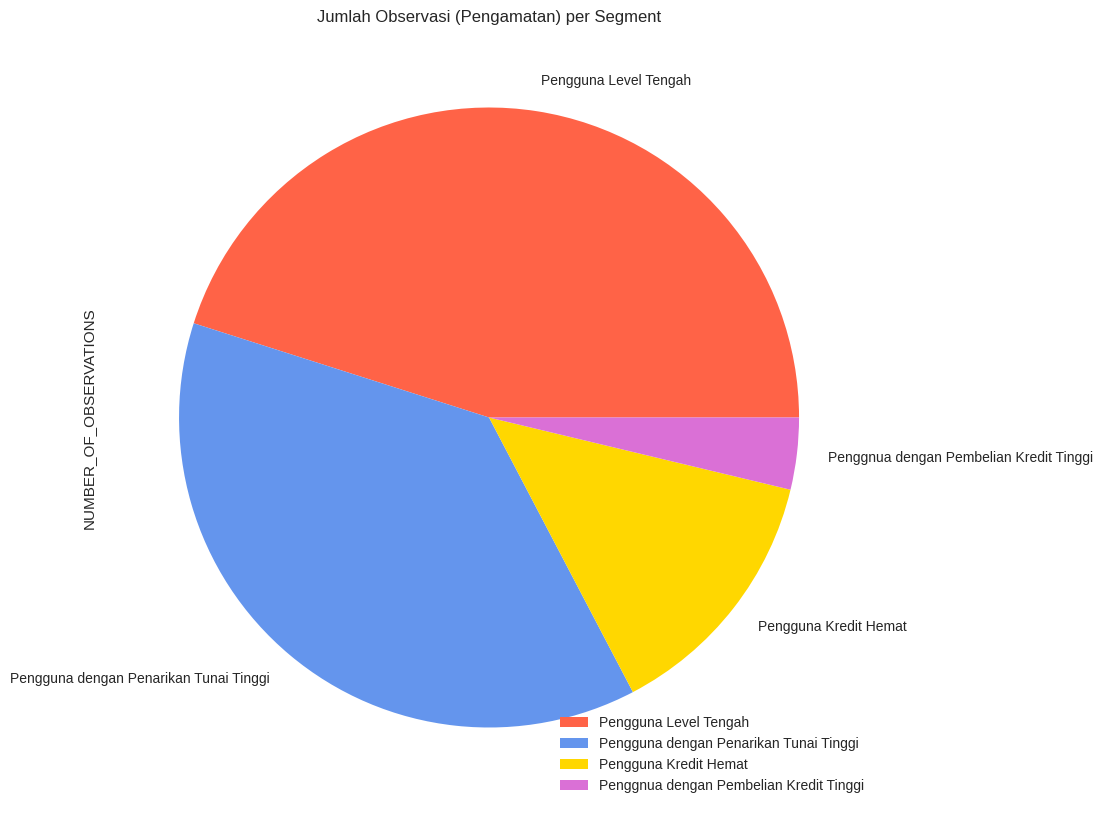

In [ ]:
pca_kmeans_freq.plot.pie(y='NUMBER_OF_OBSERVATIONS', figsize=(10, 12), cmap='CMRmap', colors=['tomato', 'cornflowerblue', 'gold', 'orchid'])
plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.title('Jumlah Observasi (Pengamatan) per Segment')
plt.show()

Dari visualisasi terlihat bahwa segment memiliki jumlah record yang berbeda. Urutan grup juga diubah ketika memasukkan PCA Component berdasarkan KMeans clustering.

**Analisa PCA**

* Membuat visualisasi plot beberapa PCA Component satu sama lain dengan memberi warna pada segmen KMeans

In [ ]:
pca_kmeans['LEGEND'] = pca_kmeans['KMEANS_PCA_SEGMENT'].map({0:'Pengguna Level Tengah',
                                                              1:'Pengguna dengan Penarikan Tunai Tinggi',
                                                              2:'Pengguna Kredit Hemat',
                                                              3:'Pengguna dengan Pembelian Kredit Tinggi'})

Karena terdapat beberapa Komponen PCA, jadi akan sedikit rumit untuk merencanakan dan menyimpan semua kemungkinan kombinasi komponen di sini. maka kami akan memplot komponen yang dipilih.



*   **Plotting PCA Components**



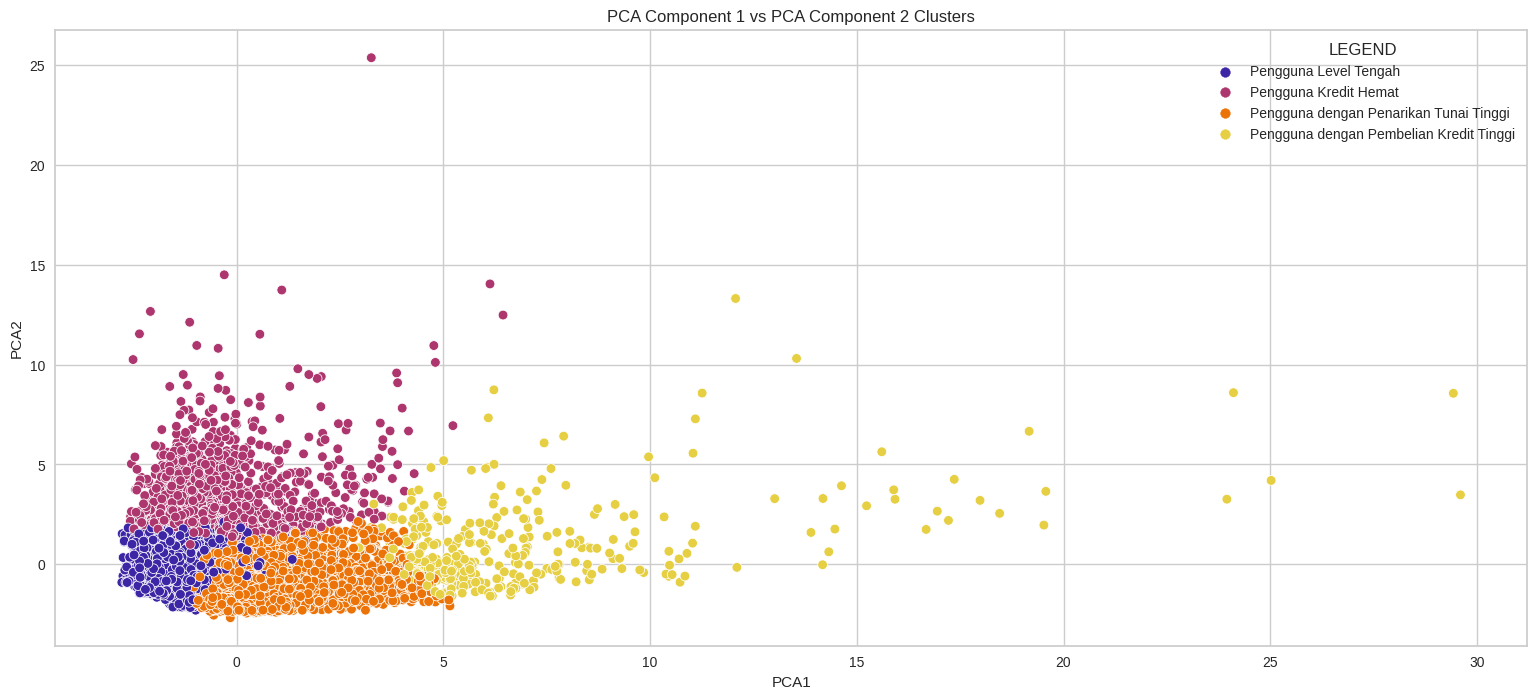

<Figure size 800x550 with 0 Axes>

In [ ]:
# Plotting perbandingan PCA 1 dan PCA 2

X = pca_kmeans['PCA1']
Y = pca_kmeans['PCA2']
plt.figure(figsize=(19, 8))
sns.scatterplot(x=X, y=Y, hue = pca_kmeans['LEGEND'], palette='CMRmap')
plt.title('PCA Component 1 vs PCA Component 2 Clusters')
plt.show()

plt.savefig("PCA Component 1 vs PCA Component 2 Clusters.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

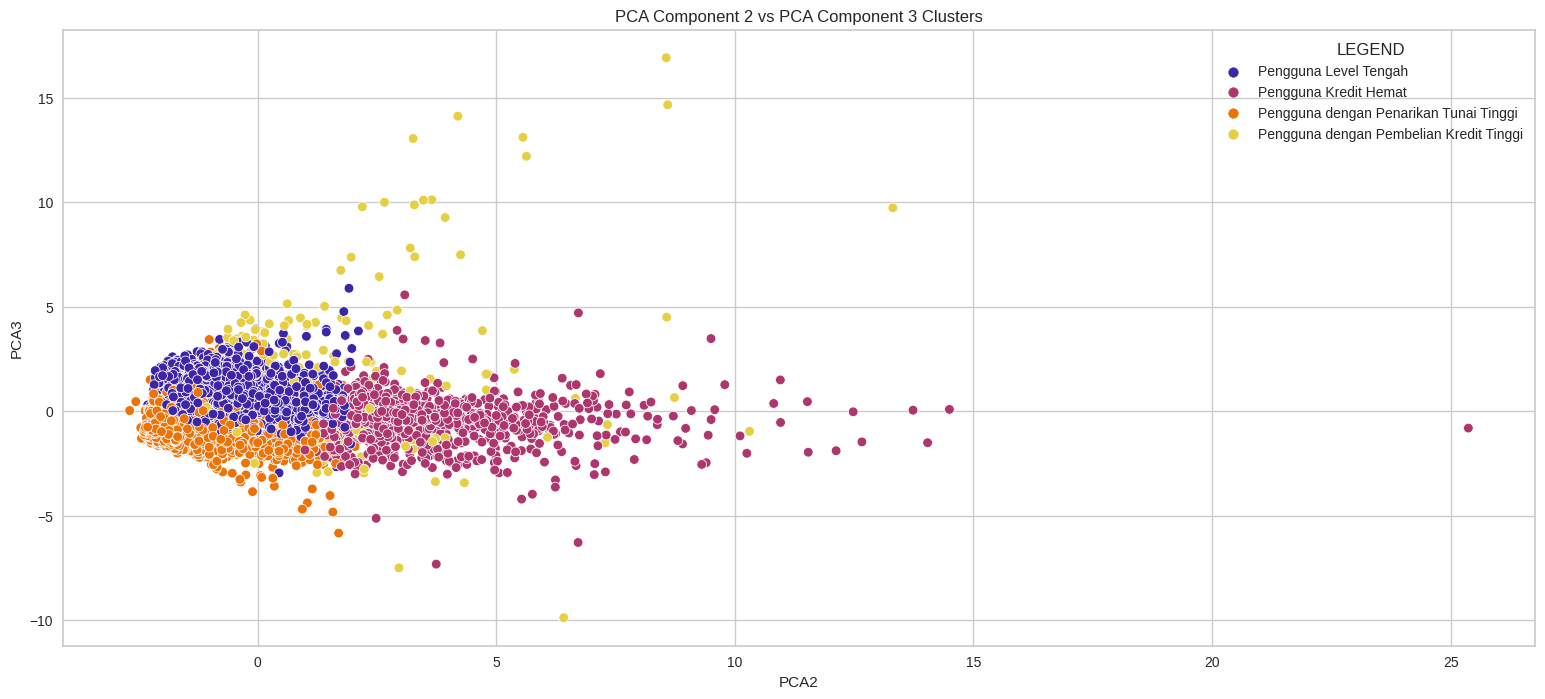

<Figure size 800x550 with 0 Axes>

In [ ]:
# Plotting perbandingan PCA 2 dan PCA 3

X = pca_kmeans['PCA2']
Y = pca_kmeans['PCA3']
plt.figure(figsize=(19, 8))
sns.scatterplot(x=X, y=Y, hue = pca_kmeans['LEGEND'], palette='CMRmap')
plt.title('PCA Component 2 vs PCA Component 3 Clusters')
plt.show()

plt.savefig("PCA Component 2 vs PCA Component 3 Clusters.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

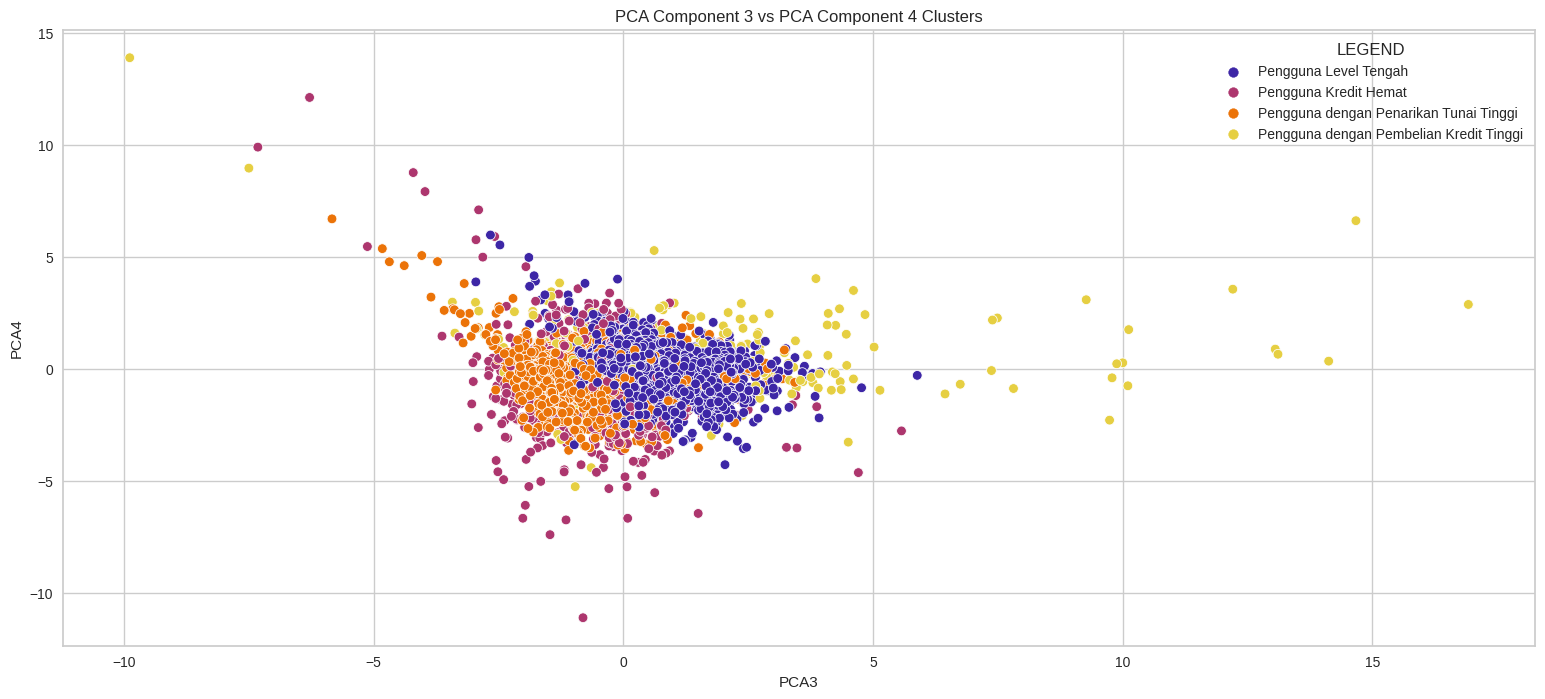

<Figure size 800x550 with 0 Axes>

In [ ]:
# Plotting perbandingan PCA 3 dan PCA 4

X = pca_kmeans['PCA3']
Y = pca_kmeans['PCA4']
plt.figure(figsize=(19, 8))
sns.scatterplot(x=X, y=Y, hue = pca_kmeans['LEGEND'], palette='CMRmap')
plt.title('PCA Component 3 vs PCA Component 4 Clusters')
plt.show()

plt.savefig("PCA Component 3 vs PCA Component 4 Clusters.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

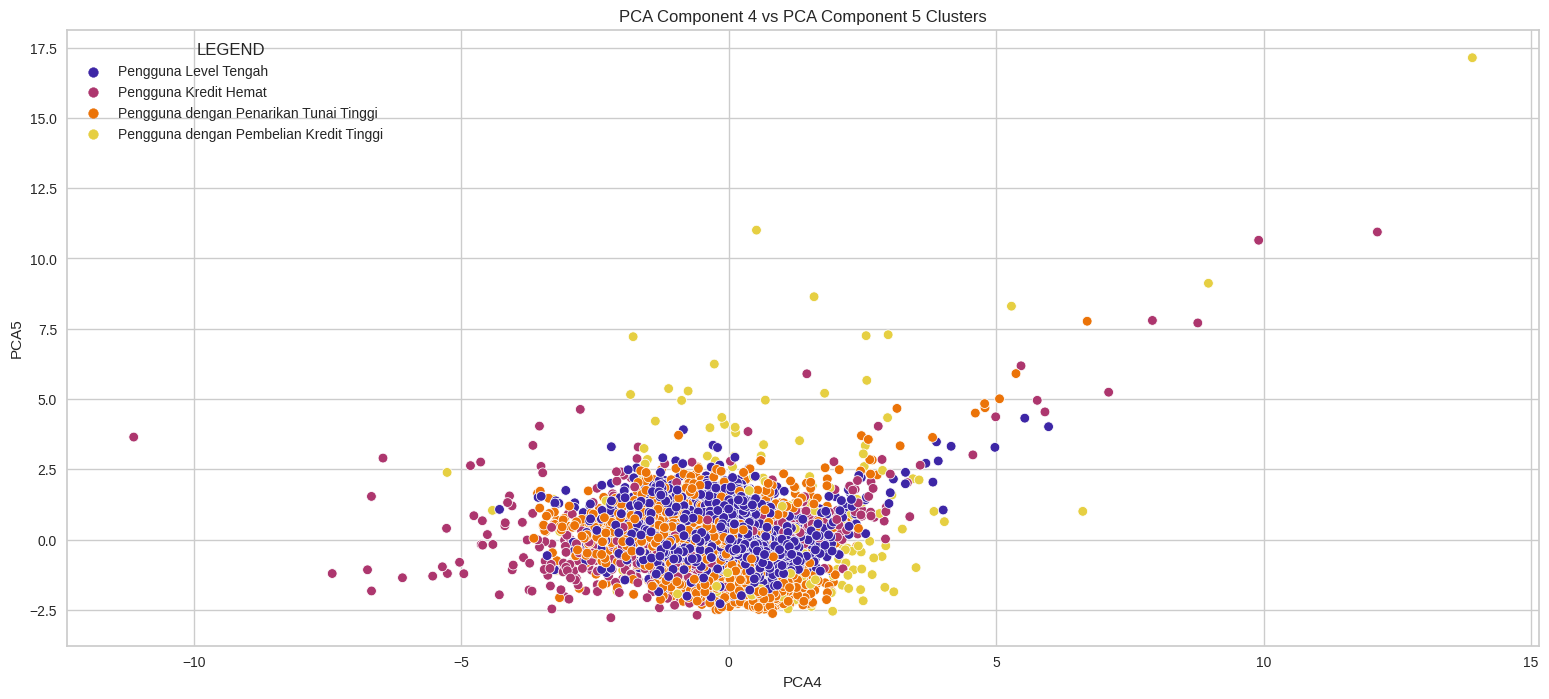

<Figure size 800x550 with 0 Axes>

In [ ]:
# Plotting perbandingan PCA 4 dan PCA 5

X = pca_kmeans['PCA4']
Y = pca_kmeans['PCA5']
plt.figure(figsize=(19, 8))
sns.scatterplot(x=X, y=Y, hue = pca_kmeans['LEGEND'], palette='CMRmap')
plt.title('PCA Component 4 vs PCA Component 5 Clusters')
plt.show()

plt.savefig("PCA Component 4 vs PCA Component 5 Clusters.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

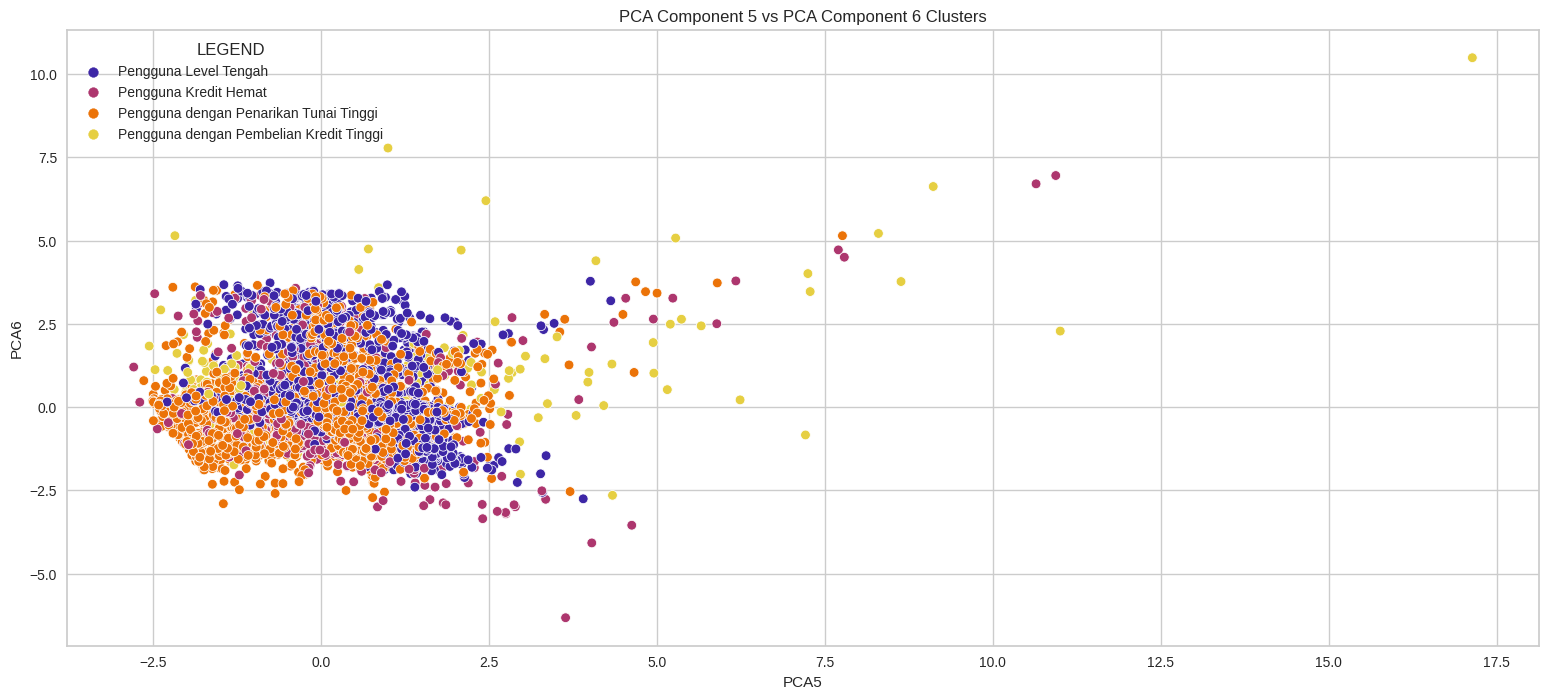

<Figure size 800x550 with 0 Axes>

In [ ]:
# Plotting perbandingan PCA 5 dan PCA 6

X = pca_kmeans['PCA5']
Y = pca_kmeans['PCA6']
plt.figure(figsize=(19, 8))
sns.scatterplot(x=X, y=Y, hue = pca_kmeans['LEGEND'], palette='CMRmap')
plt.title('PCA Component 5 vs PCA Component 6 Clusters')
plt.show()

plt.savefig("PCA Component 5 vs PCA Component 6 Clusters.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

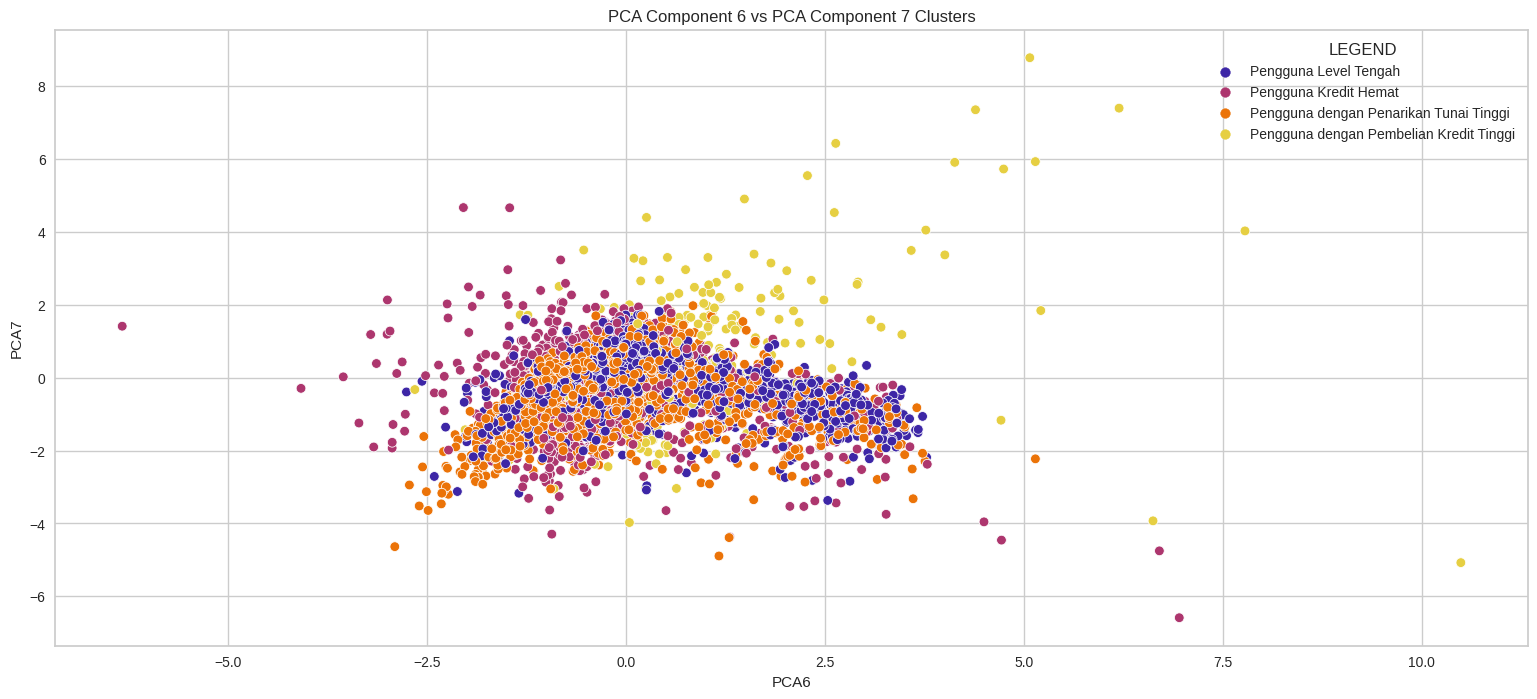

<Figure size 800x550 with 0 Axes>

In [ ]:
# Plotting perbandingan PCA 6 dan PCA 7

X = pca_kmeans['PCA6']
Y = pca_kmeans['PCA7']
plt.figure(figsize=(19, 8))
sns.scatterplot(x=X, y=Y, hue = pca_kmeans['LEGEND'], palette='CMRmap')
plt.title('PCA Component 6 vs PCA Component 7 Clusters')
plt.show()

plt.savefig("PCA Component 6 vs PCA Component 7 Clusters.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

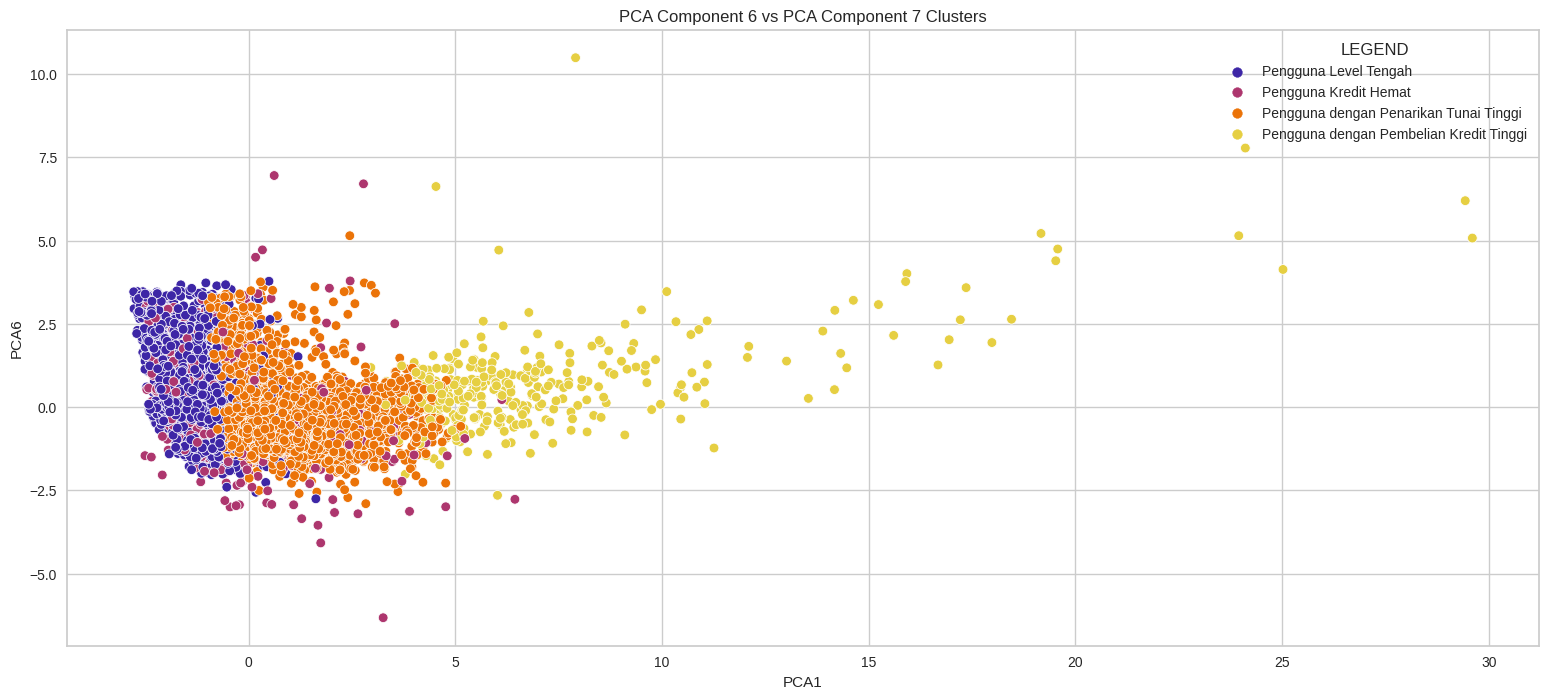

<Figure size 800x550 with 0 Axes>

In [ ]:
# Plotting perbandingan PCA 1 dan PCA 6

X = pca_kmeans['PCA1']
Y = pca_kmeans['PCA6']
plt.figure(figsize=(19, 8))
sns.scatterplot(x=X, y=Y, hue = pca_kmeans['LEGEND'], palette='CMRmap')
plt.title('PCA Component 6 vs PCA Component 7 Clusters')
plt.show()

plt.savefig("PCA Component 6 vs PCA Component 7 Clusters.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

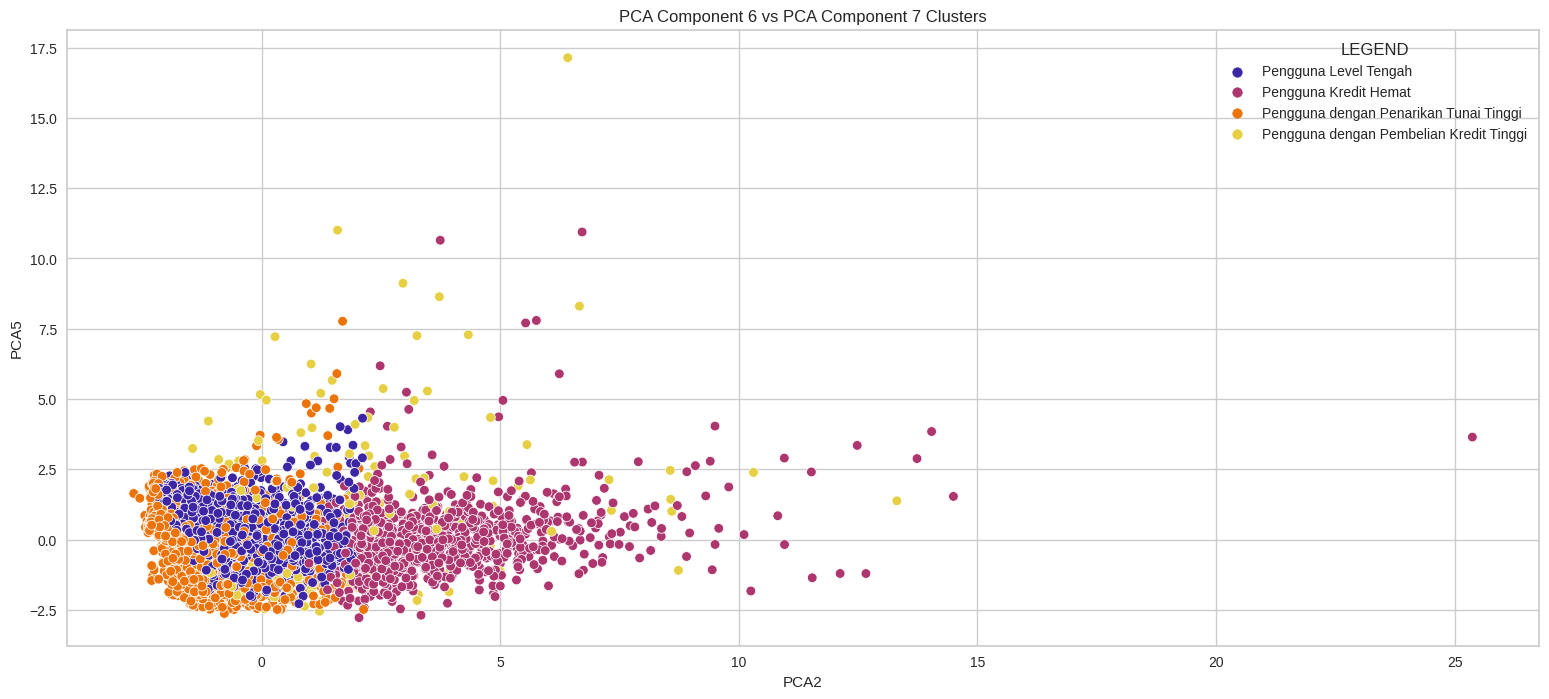

<Figure size 800x550 with 0 Axes>

In [ ]:
# Plotting perbandingan PCA 2 dan PCA 5

X = pca_kmeans['PCA2']
Y = pca_kmeans['PCA5']
plt.figure(figsize=(19, 8))
sns.scatterplot(x=X, y=Y, hue = pca_kmeans['LEGEND'], palette='CMRmap')
plt.title('PCA Component 6 vs PCA Component 7 Clusters')
plt.show()

plt.savefig("PCA Component 6 vs PCA Component 7 Clusters.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

# **UMAP Application**

Pada percobaan dibutuhkan 7 Components jika ingin mencapai jumlah variance yang ditangkap sebesar 80%. Namun kami akan mencoba menggunakan UMAP untuk teknik pengurangan dimensi yang lebih baik, dan membuat cluster menggunakan pendekatan berbeda. Kemudian kami akan mencoba melihat apakah menggunakan UMAP dapat mereduksi dataset ini menjadi 2 dimensi dengan baik.
<br><br>
Sebelumnya diharuskan menentukan jumlah tetangga (neighbors) pada poin untuk memilih jumlah cluster yang tepat. Nilai yang lebih besar untuk tetangga akan memberi kita pandangan data yang lebih luas.

* Melihat kembali dataset 5 baris dataset teratas

In [ ]:
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        312.343947          0.000000      12  
4   678.334763        244.791237          0.000000      12

* Melakukan standarisi pada dataset

In [ ]:
scaler_2 = StandardScaler()
scaledDf = scaler_2.fit_transform(df)
scaledDf

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.3024    ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09749953,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.0932934 ,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32687479,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33830497,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.3243581 ,
        -0.52555097, -4.12276757]])

* Melakukan visualisasi untuk melihat 2 dimensi dari dataset yang sudah di standarisasi dan Mendefinisikan model dari UMAP

In [ ]:
umap_data = UMAP.UMAP(n_neighbors=100,
                 n_components=2, # Untuk menganalisa jika bisa dilakukan split data pada 2 components
                 metric='euclidean',
                 n_epochs=1000,
                 learning_rate=0.1, #1.0
                 init='spectral',
                 min_dist=0.1,
                 spread=1.0,
                 low_memory=False,
                 set_op_mix_ratio=1.0,
                 local_connectivity=1,
                 repulsion_strength=1.0,
                 negative_sample_rate=5,
                 transform_queue_size=4.0,
                 random_state=3,
                 angular_rp_forest=False,
                 target_n_neighbors=-1,
                 transform_seed=3,
                 verbose=False,
                 unique=False,
                )

umap_data

UMAP(learning_rate=0.1, local_connectivity=1, low_memory=False, n_epochs=1000, n_neighbors=100, random_state=3, transform_seed=3)

* Melatih model dari UMAP data

In [ ]:
umap_fit = umap_data.fit_transform(scaledDf)
umap_fit

array([[3.3478465 , 3.9389315 ],
       [0.6343387 , 7.93622   ],
       [4.782246  , 8.980043  ],
       ...,
       [9.097591  , 2.8710053 ],
       [0.74352247, 1.900574  ],
       [1.1632874 , 2.1726363 ]], dtype=float32)

* Melihat dimensi dari UMAP data

In [ ]:
umap_fit.shape

(8950, 2)

* Menambahkan nilai UMAP pada dataframe dengan membuat kolom baru

In [ ]:
data_umap = pd.concat([df, pd.DataFrame(umap_fit, columns=['UMAP1', 'UMAP2'])], axis=1)

data_umap.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE     UMAP1     UMAP2  
0   201.802084        139.509787          0.000000      12  3.347847  3.938931  
1  4103.032597       1072.340217          0.222222      12  0.634339  7.936220  
2   622.066742        627.284787          0.000000      12  4.782246  8.980043  
3     0.000000        312.343947          0.000000      12  3.909031  3.146935  
4   678.334763        244.791237          0.000000      12  2.627498  4.556407

* Melihat apakah terdapat missing value pada UMAP data

In [ ]:
data_umap.isnull().any()

BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
UMAP1                               False
UMAP2                               False
dtype: bool

* Menerapkan kembali K-Means ke data yang dikembalikan dari penerapan UMAP yang hanya dengan 2 komponen dan Membuat visualisasi jumlah cluster KMeans dengan UMAP Data.

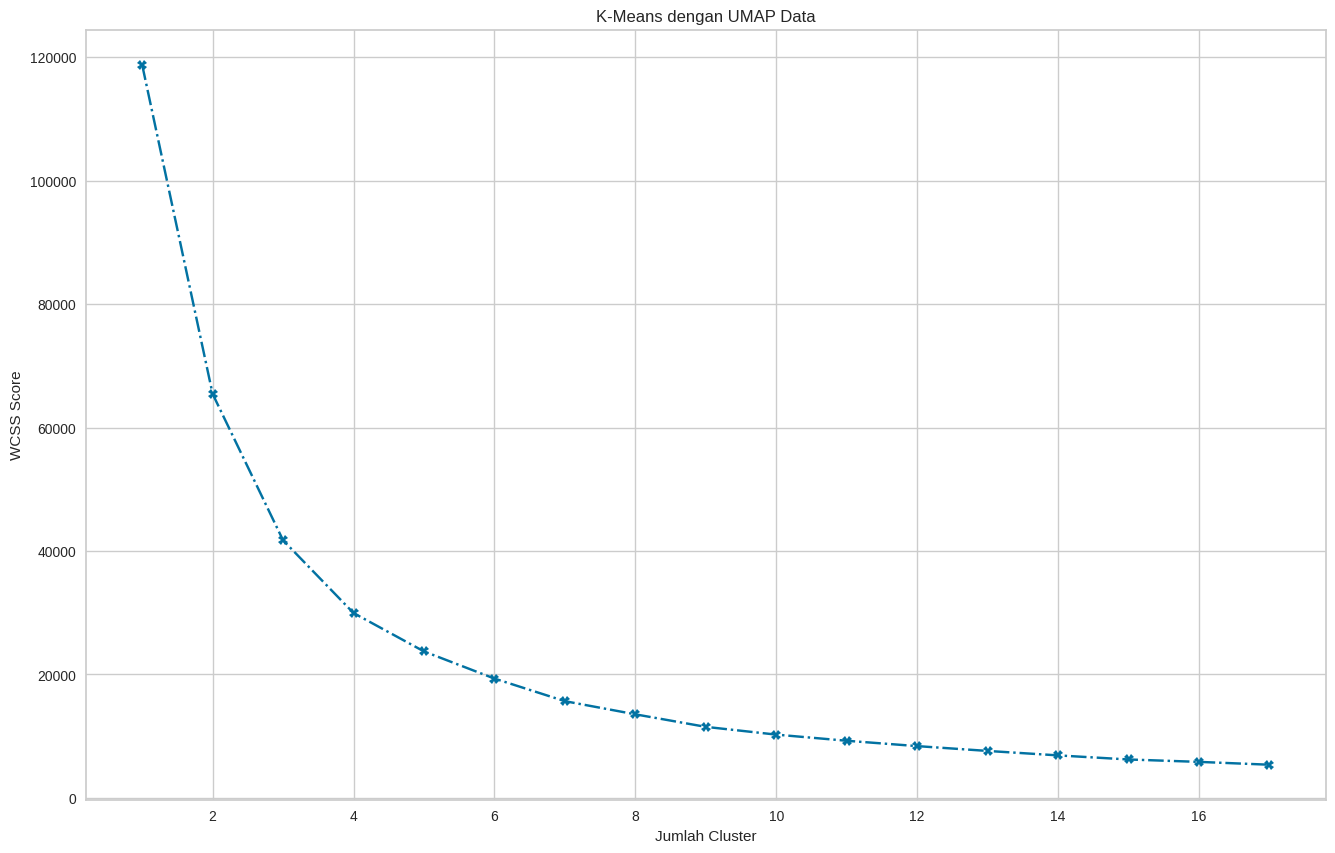

In [ ]:
wcss = []
for i in range(1, 18):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=3)
    kmeans_pca.fit(umap_fit)
    wcss.append(kmeans_pca.inertia_)

plt.figure(figsize=(16,10))
plt.plot(range(1, 18), wcss, marker='X', linestyle='-.')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS Score')
plt.title('K-Means dengan UMAP Data')
plt.show()

Dengan menggunakan K-Means pada data UMAP, didapatkan jumlah cluster yang optimal yaitu 4 berdasarkan plot Screen. Namun, dengan menggunakan 4 cluster diperoleh score WCSS yang jauh lebih rendah daripada ketika diterapkan pada komponen PCA.

* Melatih KMeans UMAP dengan n_clusters = 4

In [ ]:
kmeans_umap = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_umap.fit(umap_fit)

KMeans(n_clusters=4, random_state=42)

* Memasukan hasil KMeans UMAP segment ke dalam dataframe data_umap_kmeans

In [ ]:
data_umap_kmeans = pd.concat([df.reset_index(drop=True), pd.DataFrame(umap_fit)], axis=1)
data_umap_kmeans.columns.values[-2:] = ['UMAP1', 'UMAP2']

data_umap_kmeans['KMEANS_UMAP_SEGMENT'] = kmeans_umap.labels_
data_umap_kmeans.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE     UMAP1  \
0   201.802084        139.509787          0.000000      12  3.347847   
1  4103.032597       1072.340217          0.222222      12  0.634339   
2   622.066742        627.284787          0.000000      12  4.782246   
3     0.000000        312.343947          0.000000      12  3.909031   
4   678.334763        244.791237          0.000000      12  2.627498   

      UMAP2  KMEANS_UMAP_SEGMENT  
0  3.938931                    2  
1  7.936220                    1  
2  8.980043                    3  
3  3.146935                    2  
4  4.556407                    2

* Melihat persebaran data pada masing-masing cluster

In [ ]:
data_umap_kmeans['KMEANS_UMAP_SEGMENT'].value_counts()

1    2771
3    2746
2    1897
0    1536
Name: KMEANS_UMAP_SEGMENT, dtype: int64

Menggunakan pendekatan 4 cluster K-Means yang sama, menggunakan UMAP tampaknya mengembalikan kelas yang kurang seimbang dibandingkan dengan PCA.

* Melihat frekuensi rata-rata KMeans UMA Segment dengan melakukan grouping

In [ ]:
umap_kmeans_freq = data_umap_kmeans.groupby(['KMEANS_UMAP_SEGMENT']).mean()
umap_kmeans_freq

BALANCE  BALANCE_FREQUENCY    PURCHASES  \
KMEANS_UMAP_SEGMENT                                                
0                     142.484321           0.778971   573.522904   
1                    2804.343267           0.983378   335.788863   
2                     686.140445           0.648662   317.439831   
3                    1715.495329           0.983111  2390.785790   

                     ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
KMEANS_UMAP_SEGMENT                                                           
0                           89.105833              485.080469     98.328613   
1                          256.217539               79.769646   2188.549941   
2                          248.870353               68.630891    750.059893   
3                         1450.605262              940.545277    408.786672   

                     PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
KMEANS_UMAP_SEGMENT                                                    
0                               0.777657                    0.048646   
1                               0.164124                    0.103729   
2                               0.190126                    0.100345   
3                               0.866241                    0.458663   

                     PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
KMEANS_UMAP_SEGMENT                                                             
0                                            0.711990                0.019812   
1                                            0.076046                0.287462   
2                                            0.091693                0.102374   
3                                            0.649466                0.068590   

                     CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
KMEANS_UMAP_SEGMENT                                                  
0                            0.335938      12.307943   3083.310218   
1                            7.573800       4.099603   5154.410398   
2                            1.888245       3.245124   3369.601125   
3                            1.453751      34.680262   5394.340528   

                        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
KMEANS_UMAP_SEGMENT                                                    
0                     695.988145        190.412897          0.482262   
1                    2046.952055       1021.011920          0.026466   
2                    1046.224734        339.564519          0.047181   
3                    2471.160677       1382.397461          0.171941   

                        TENURE     UMAP1     UMAP2  
KMEANS_UMAP_SEGMENT                                 
0                    11.074870  7.338638  4.150567  
1                    11.878744  0.801756  7.034801  
2                    10.733790  2.866681  3.078090  
3                    11.941369  5.770100  7.717547

* Memberikan nama label pada cluster seperti sebelumnya dan menjelajahi beberapa variabel dengan cluster yang dihasilkan dengan segmen UMAP

In [ ]:
data_umap_kmeans['LABELS'] = data_umap_kmeans['KMEANS_UMAP_SEGMENT'].map({0:'Pengguna yang Bergantung Pada Uang Muka',
                                                                           1:'Pengguna dengan Pembelian dan Kredit Besar',
                                                                           2:'Pengguna Normal (Standard)',
                                                                           3:'Pengguna dengan Cicilan Pembelian dan Minimal Kredit'})
data_umap_kmeans.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE     UMAP1  \
0   201.802084        139.509787          0.000000      12  3.347847   
1  4103.032597       1072.340217          0.222222      12  0.634339   
2   622.066742        627.284787          0.000000      12  4.782246   
3     0.000000        312.343947          0.000000      12  3.909031   
4   678.334763        244.791237          0.000000      12  2.627498   

      UMAP2  KMEANS_UMAP_SEGMENT  \
0  3.938931                    2   
1  7.936220                    1   
2  8.980043                    3   
3  3.146935                    2   
4  4.556407                    2   

                                              LABELS  
0                         Pengguna Normal (Standard)  
1         Pengguna dengan Pembelian dan Kredit Besar  
2  Pengguna dengan Cicilan Pembelian dan Minimal ...  
3                         Pengguna Normal (Standard)  
4                         Pengguna Normal (Standard)

* Melakukan eksplorasi pada UMAP K-Means Clusters

**Penarikan Tunai vs Pembelian Angsuran**

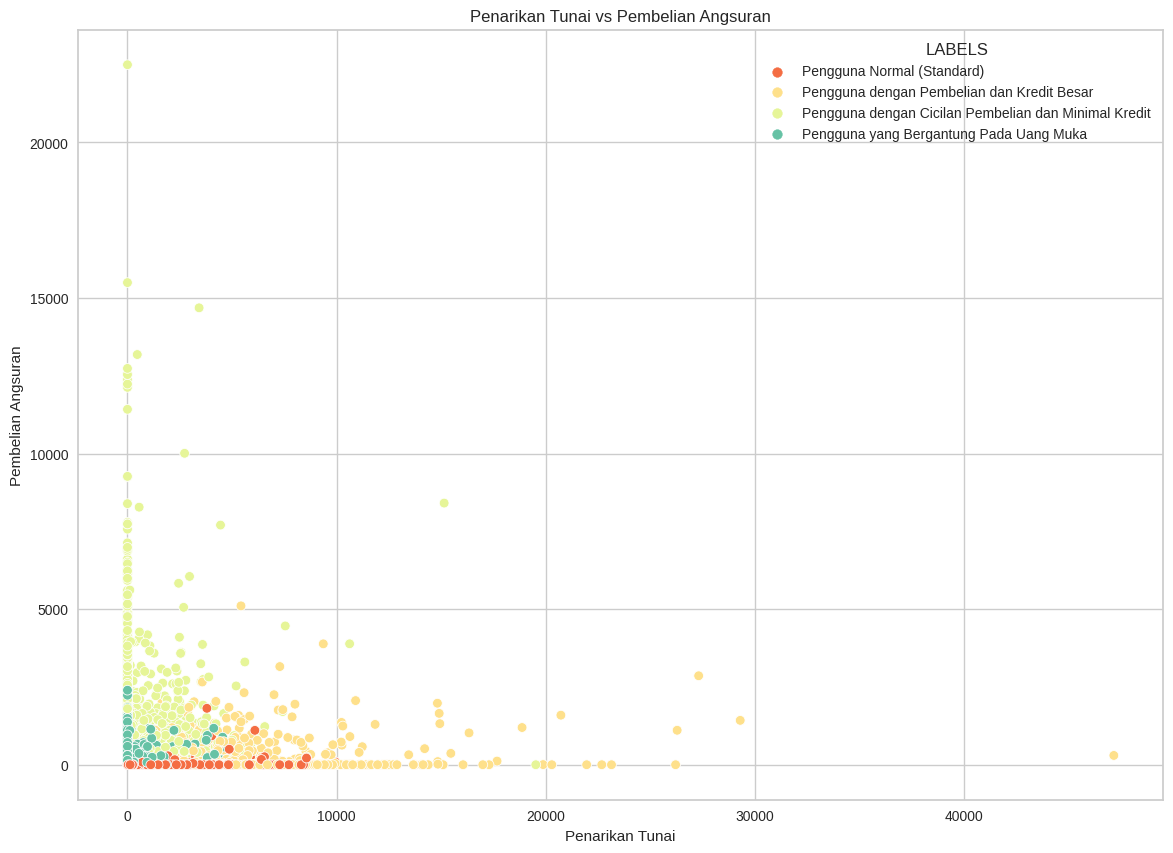

<Figure size 800x550 with 0 Axes>

In [ ]:
plt.figure(figsize=(14,10))
X = data_umap_kmeans['CASH_ADVANCE']
Y = data_umap_kmeans['INSTALLMENTS_PURCHASES']
g = sns.scatterplot(x=X, y=Y, hue = data_umap_kmeans['LABELS'], palette = 'Spectral')
g.set_xlabel('Penarikan Tunai')
g.set_ylabel('Pembelian Angsuran')
g.set_title('Penarikan Tunai vs Pembelian Angsuran')
plt.show()

plt.savefig("Penarikan Tunai vs Pembelian Angsuran UMAP.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

Pada hasil grafik bisa dilihat bahwa Pengguna yang bergantung pada uang muka yang ditunjukkan dengan warna hijau muda dapat melakukan banyak pembelian angsuran (cicilan) tanpa harus melakukan penarikan tunai atau mengambil uang muka menggunakan kredit.

Sedangkan, Pengguna dengan pembelian dan kredit besar yang ditunjukan dengan warna orange umumya memiliki penggunaan uang muka atau penarikan tunai yang lebih tinggi yang artinya ia sangat bergantung pada uang muka tunai walaupun berada di ujung bawah pembelian angsuran

**Pembelian vs Pembayaran**

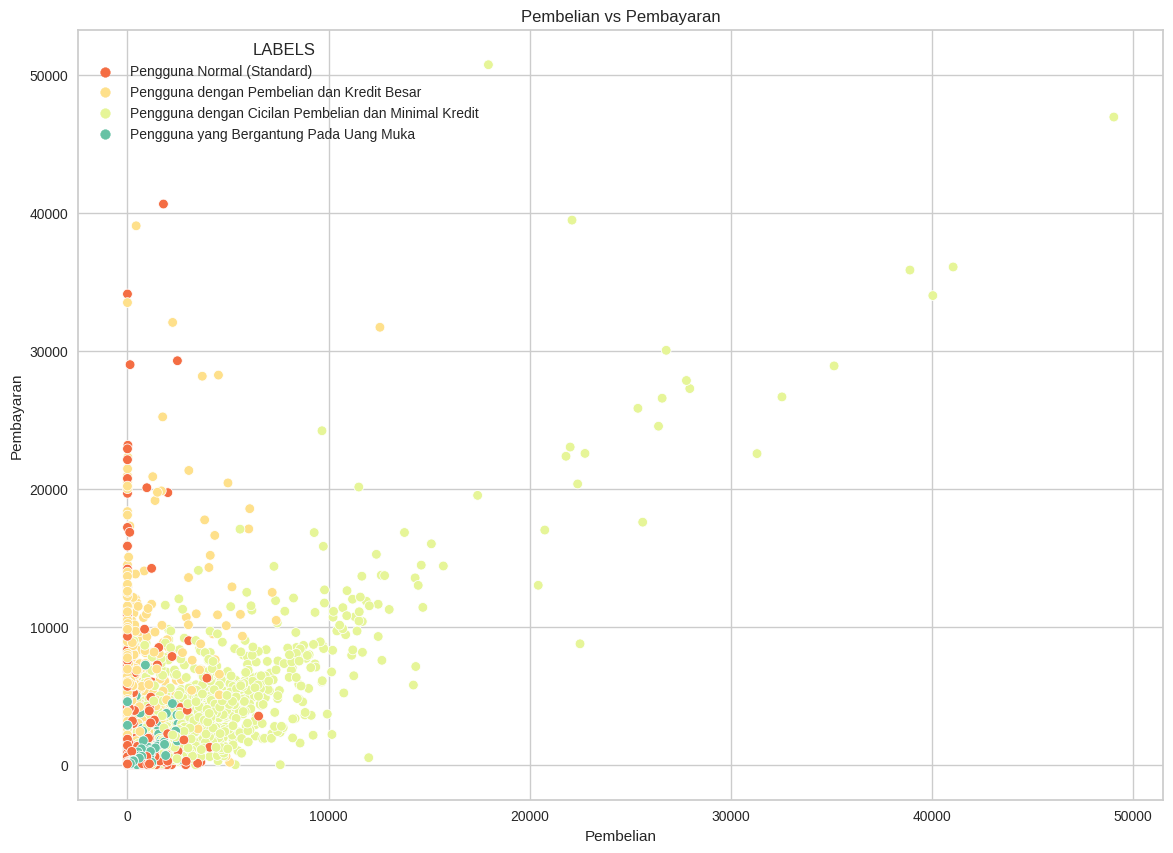

<Figure size 800x550 with 0 Axes>

In [ ]:
plt.figure(figsize=(14,10))
X = data_umap_kmeans['PURCHASES']
Y = data_umap_kmeans['PAYMENTS']
g = sns.scatterplot(x=X, y=Y, hue = data_umap_kmeans['LABELS'], palette = 'Spectral')
g.set_xlabel('Pembelian')
g.set_ylabel('Pembayaran')
g.set_title('Pembelian vs Pembayaran')

plt.show()

plt.savefig("Pembelian vs Pembayaran UMAP.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

Pada grafik terlihat bahwa pengguna yang bergantung pada uang muka (hijau muda) paling banyak melakukan pembelian dan pembayaran dengan jumlah melebihi 40000, sedangkan Pengguna dengan cicilan pembelian dan minimal kredit (warna merah) serta Pengguna dengan pembelian dan kredit besar (orange) hampir memiliki persebaran yang sama dimana keduanya memiliki pembayaran yang tinggi dengan kurang lebih 40000. Terakhir Pengguna normal (standard) dengan warna biru memiliki pembelian dan pembayan yang kecil yaitu kurang dari 10000

**Pembelian Satu Kali (one off) vs Batas Kredit**

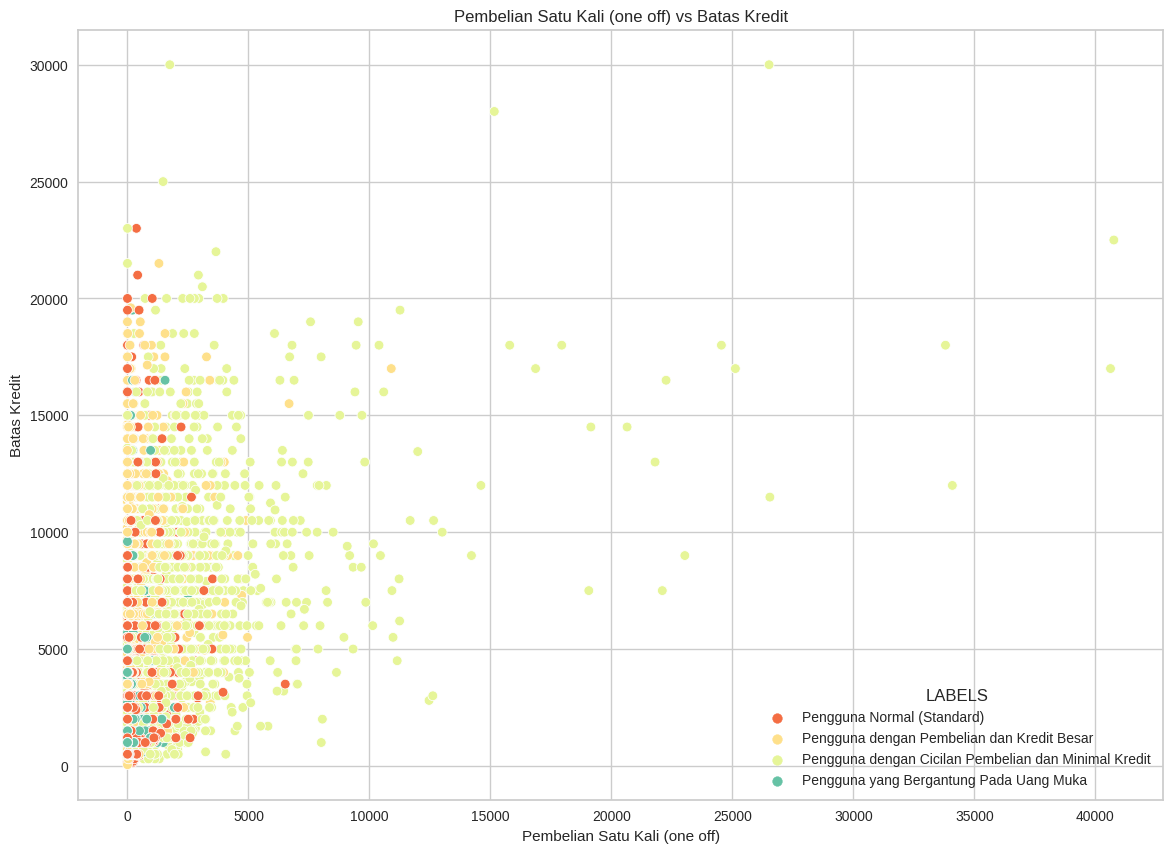

<Figure size 800x550 with 0 Axes>

In [ ]:
plt.figure(figsize=(14,10))
X = data_umap_kmeans['ONEOFF_PURCHASES']
Y = data_umap_kmeans['CREDIT_LIMIT']
g = sns.scatterplot(x=X, y=Y, hue = data_umap_kmeans['LABELS'], palette = 'Spectral')
g.set_xlabel('Pembelian Satu Kali (one off)')
g.set_ylabel('Batas Kredit')
g.set_title('Pembelian Satu Kali (one off) vs Batas Kredit')

plt.show()

plt.savefig("Pembelian Satu Kali (one off) vs Batas Kredit UMAP.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

Dari grafik terlihat bahwa semua cluster atau bagian rata-rata memiliki batas kredit kurang lebih 24000 dengan pembelian one off kurang lebih 11000. Namun pada cluster pengguna yang bergantung pada uang muka (hijau muda) terdapat beberapa pengguna dengan batas kredit lebih dari 24000 dan pembelian one off lebih dari 11000

**Saldo vs Minimal / Minimum Pembayaran**

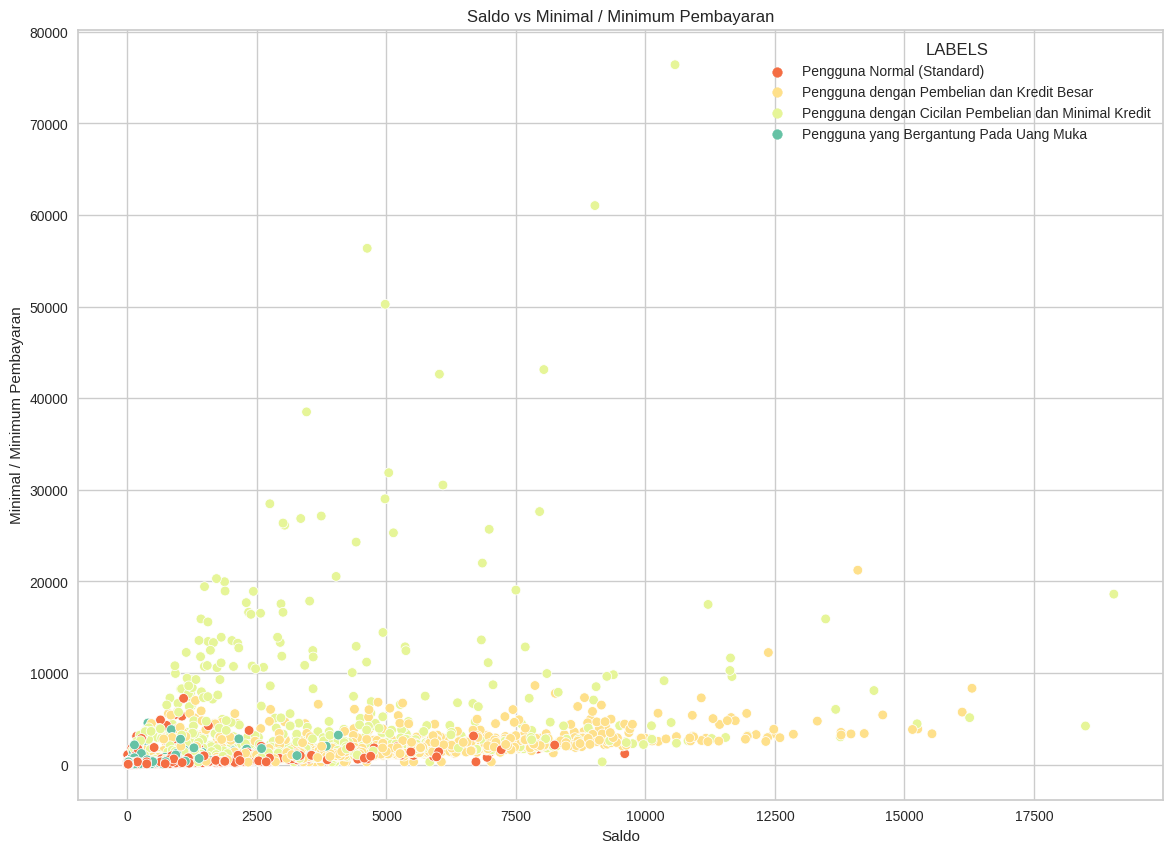

<Figure size 800x550 with 0 Axes>

In [ ]:
plt.figure(figsize=(14,10))
X = data_umap_kmeans['BALANCE']
Y = data_umap_kmeans['MINIMUM_PAYMENTS']
g = sns.scatterplot(x=X, y=Y, hue = data_umap_kmeans['LABELS'], palette = 'Spectral')
g.set_xlabel('Saldo')
g.set_ylabel('Minimal / Minimum Pembayaran')
g.set_title('Saldo vs Minimal / Minimum Pembayaran')

plt.show()

plt.savefig("Saldo vs Minimum Pembayaran UMAP.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

Dari grafik dapat dilihat bahwa cluster Pengguna yang bergantung pada uang muka (hijau muda) memiliki saldo tinggi yang serupa dengan cluster pengguna dengan pembelian dan kredit besar (orange). Dapat dilihat bahwa cluster Pengguna yang bergantung pada uang muka (hijau muda) bagaimanapun memiliki pembayaran minimum yang lebih tinggi, hal ini sesuai karena cluster ini membeli paling banyak dibandingkan dengan yang lain.

* Membuat pie chart yang sama dengan data yang menggunakan PCA untuk memvisualisasikan Jumlah Pengamatan per Segment

In [ ]:
umap_kmeans_freq['NUMBER_OF_OBSERVATIONS'] = data_umap_kmeans[['KMEANS_UMAP_SEGMENT', 'BALANCE']].groupby(['KMEANS_UMAP_SEGMENT']).count()
umap_kmeans_freq['OBSERVATIONAL_PROPORTIUONS'] = umap_kmeans_freq['NUMBER_OF_OBSERVATIONS'] / umap_kmeans_freq['NUMBER_OF_OBSERVATIONS'].sum()
umap_kmeans_freq = umap_kmeans_freq.rename({0:'Pengguna yang Bergantung Pada Uang Muka',
                                            1:'Pengguna dengan Pembelian dan Kredit Besar',
                                            2:'Pengguna Normal (Standard)',
                                            3:'Pengguna dengan Cicilan Pembelian dan Minimal Kredit'})
umap_kmeans_freq

BALANCE  \
KMEANS_UMAP_SEGMENT                                               
Pengguna yang Bergantung Pada Uang Muka              142.484321   
Pengguna dengan Pembelian dan Kredit Besar          2804.343267   
Pengguna Normal (Standard)                           686.140445   
Pengguna dengan Cicilan Pembelian dan Minimal K...  1715.495329   

                                                    BALANCE_FREQUENCY  \
KMEANS_UMAP_SEGMENT                                                     
Pengguna yang Bergantung Pada Uang Muka                      0.778971   
Pengguna dengan Pembelian dan Kredit Besar                   0.983378   
Pengguna Normal (Standard)                                   0.648662   
Pengguna dengan Cicilan Pembelian dan Minimal K...           0.983111   

                                                      PURCHASES  \
KMEANS_UMAP_SEGMENT                                               
Pengguna yang Bergantung Pada Uang Muka              573.522904   
Pengguna dengan Pembelian dan Kredit Besar           335.788863   
Pengguna Normal (Standard)                           317.439831   
Pengguna dengan Cicilan Pembelian dan Minimal K...  2390.785790   

                                                    ONEOFF_PURCHASES  \
KMEANS_UMAP_SEGMENT                                                    
Pengguna yang Bergantung Pada Uang Muka                    89.105833   
Pengguna dengan Pembelian dan Kredit Besar                256.217539   
Pengguna Normal (Standard)                                248.870353   
Pengguna dengan Cicilan Pembelian dan Minimal K...       1450.605262   

                                                    INSTALLMENTS_PURCHASES  \
KMEANS_UMAP_SEGMENT                                                          
Pengguna yang Bergantung Pada Uang Muka                         485.080469   
Pengguna dengan Pembelian dan Kredit Besar                       79.769646   
Pengguna Normal (Standard)                                       68.630891   
Pengguna dengan Cicilan Pembelian dan Minimal K...              940.545277   

                                                    CASH_ADVANCE  \
KMEANS_UMAP_SEGMENT                                                
Pengguna yang Bergantung Pada Uang Muka                98.328613   
Pengguna dengan Pembelian dan Kredit Besar           2188.549941   
Pengguna Normal (Standard)                            750.059893   
Pengguna dengan Cicilan Pembelian dan Minimal K...    408.786672   

                                                    PURCHASES_FREQUENCY  \
KMEANS_UMAP_SEGMENT                                                       
Pengguna yang Bergantung Pada Uang Muka                        0.777657   
Pengguna dengan Pembelian dan Kredit Besar                     0.164124   
Pengguna Normal (Standard)                                     0.190126   
Pengguna dengan Cicilan Pembelian dan Minimal K...             0.866241   

                                                    ONEOFF_PURCHASES_FREQUENCY  \
KMEANS_UMAP_SEGMENT                                                              
Pengguna yang Bergantung Pada Uang Muka                               0.048646   
Pengguna dengan Pembelian dan Kredit Besar                            0.103729   
Pengguna Normal (Standard)                                            0.100345   
Pengguna dengan Cicilan Pembelian dan Minimal K...                    0.458663   

                                                    PURCHASES_INSTALLMENTS_FREQUENCY  \
KMEANS_UMAP_SEGMENT                                                                    
Pengguna yang Bergantung Pada Uang Muka                                     0.711990   
Pengguna dengan Pembelian dan Kredit Besar                                  0.076046   
Pengguna Normal (Standard)                                                  0.091693   
Pengguna dengan Cicilan Pembelian dan Minimal K...                          0.649466   

                           

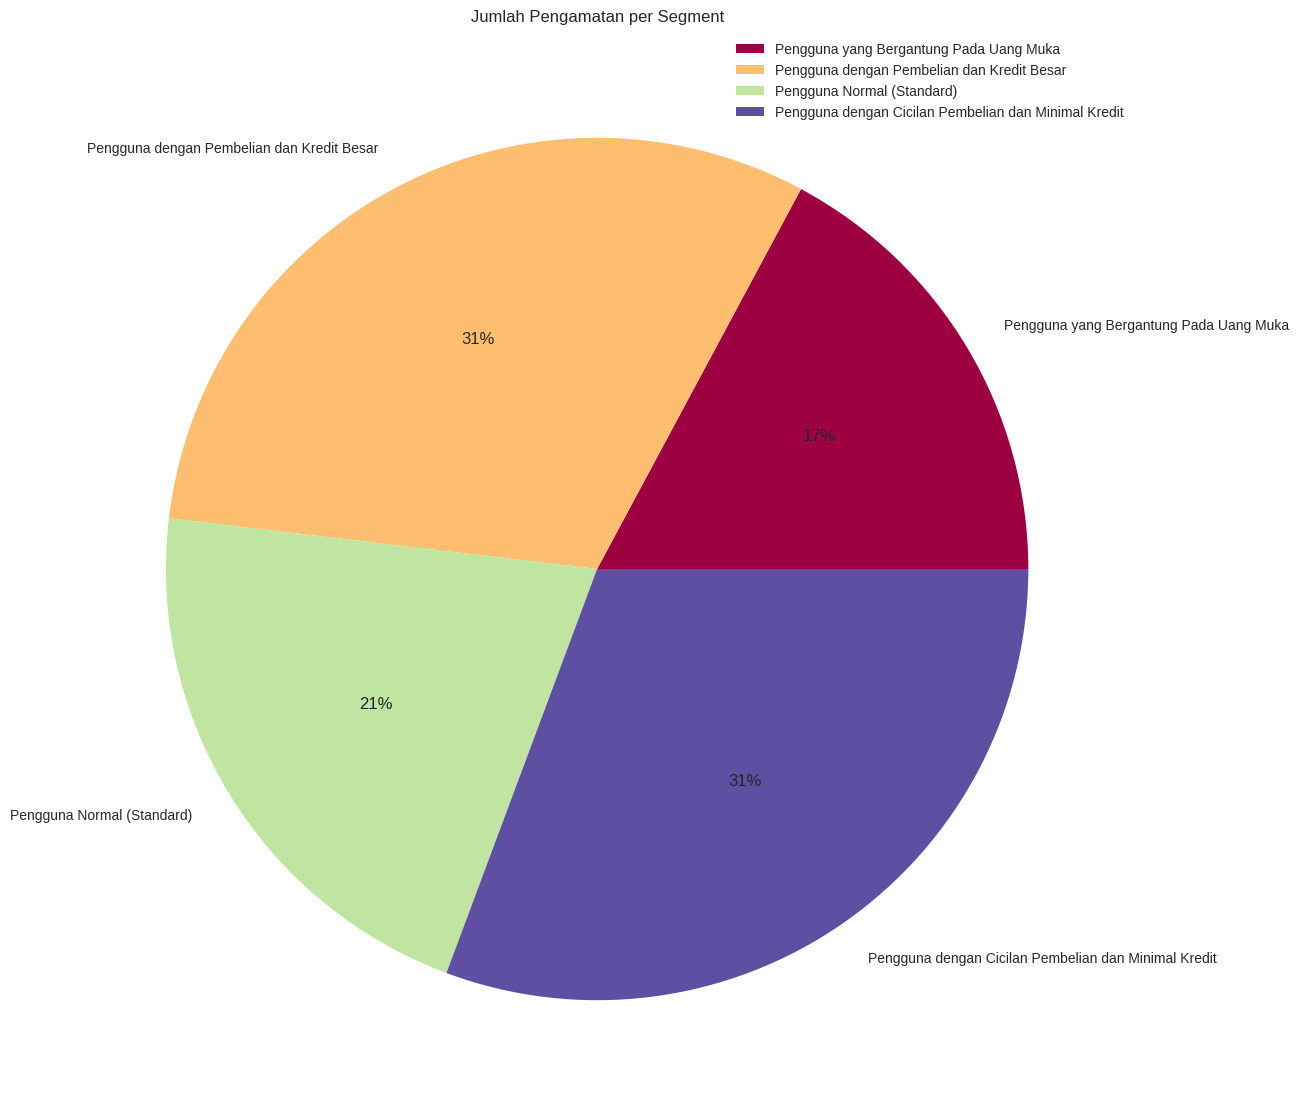

<Figure size 800x550 with 0 Axes>

In [ ]:
umap_kmeans_freq.plot.pie(y='NUMBER_OF_OBSERVATIONS', figsize=(14, 14), autopct='%1.0f%%', cmap = 'Spectral')
plt.ylabel(None, loc='center')
plt.title('Jumlah Pengamatan per Segment')
plt.show()

plt.savefig("Jumlah Pengamatan per Segment UMAP.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

Dengan menggunakan UMAP sebagai teknik pengurangan dimensi dengan skema K-Means yang sama, diperoleh cluster yang lebih seimbang daripada saat menggunakan PCA.

* Melihat Prformance Matrics

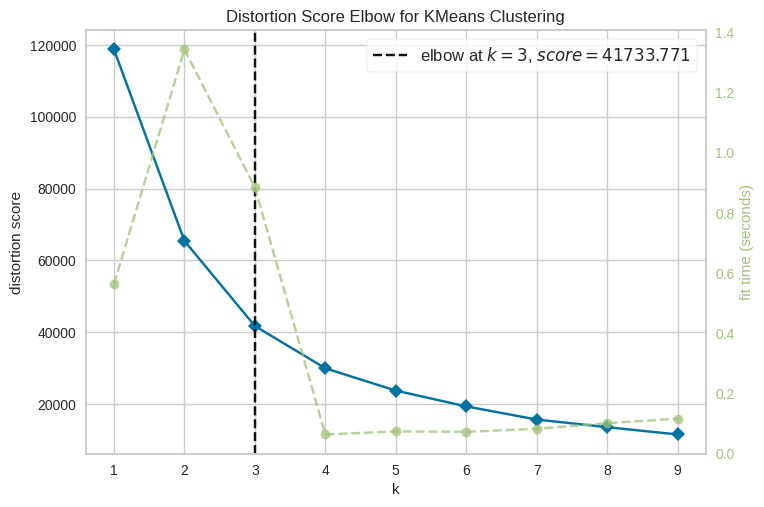

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
visualizer = KElbowVisualizer(kmeans_umap, k=(1,10))
visualizer.fit(umap_fit)
visualizer.show()

In [ ]:
model_umap = KMeans(visualizer.elbow_value_, random_state=42)
labels = model_umap.fit_predict(umap_fit)

In [ ]:
data_umap_kmeans['KMEANS_UMAP_SEGMENT'] =  labels

print(f'Davies-Bouldin index = {davies_bouldin_score(umap_fit, labels)}')
print(f'Silhouette Score = {silhouette_score(umap_fit, labels)}')

Standard Scaler
Davies-Bouldin index = 0.8126947149251343
Silhouette Score = 0.4273034334182739


hasil dari performance matrics menggunakan DBI yakni 0.812 dan dengan Silhouette 0.427

---
##**Model Inference**
---

Pada Model Inference kami akan menggunakan data umap kmeans.

* Melihat Info Dataset

In [ ]:
data = data_umap_kmeans.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

* Menghapus kolom yang tidak diperlukan

In [ ]:
data.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE     UMAP1  \
0   201.802084        139.509787          0.000000      12  3.347847   
1  4103.032597       1072.340217          0.222222      12  0.634339   
2   622.066742        627.284787          0.000000      12  4.782246   
3     0.000000        312.343947          0.000000      12  3.909031   
4   678.334763        244.791237          0.000000      12  2.627498   

      UMAP2  KMEANS_UMAP_SEGMENT  \
0  3.938931                    2   
1  7.936220                    1   
2  8.980043                    3   
3  3.146935                    2   
4  4.556407                    2   

                                              LABELS  
0                         Pengguna Normal (Standard)  
1         Pengguna dengan Pembelian dan Kredit Besar  
2  Pengguna dengan Cicilan Pembelian dan Minimal ...  
3                         Pengguna Normal (Standard)  
4                         Pengguna Normal (Standard)

In [ ]:
drop_cols = ['PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
             'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PRC_FULL_PAYMENT', 'UMAP1', 'UMAP2',
             'KMEANS_UMAP_SEGMENT']

In [ ]:
data = data.drop(drop_cols, axis=1)
data.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
0                    95.4      0.000000        1000.0   201.802084   
1                     0.0   6442.945483        7000.0  4103.032597   
2                     0.0      0.000000        7500.0   622.066742   
3                     0.0    205.788017        7500.0     0.000000   
4                     0.0      0.000000        1200.0   678.334763   

   MINIMUM_PAYMENTS  TENURE                                             LABELS  
0        139.509787      12                         Pengguna Normal (Standard)  
1       1072.340217      12         Pengguna dengan Pembelian dan Kredit Besar  
2        627.284787      12  Pengguna dengan Cicilan Pembelian dan Minimal ...  
3        312.343947      12                         Pengguna Normal (Standard)  
4        244.791237      12                         Pengguna Normal (Standard)

Kolom yang akan kami gunakan adalah BALANCE, Balance_FREQUENCY, PURCHASE, ONEOFF_PURCHASE, CASH_ADVANCE, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, dan TENURE.

* Melakukan inisialisasi variabel X dan y

Disini kami mendefinisikan untuk variabel X nya yaitu kolom selain LABELS, sedangkan untuk variabel y yaitu LABELS.

In [ ]:
X = data.drop(['LABELS'], axis=1)
y = data['LABELS']

print(X.shape)
print(y.shape)

(8950, 10)
(8950,)


* Membagi data menjadi Training dan Testing pada kolom atau atribut yang sudah diperoleh. Untuk proporsi Training data sebesar 80% (0.80) dan Testing data sebesar 20% (0.20)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y, test_size=0.20, random_state=13)

print(X_train.shape)
print(X_test.shape)

(7160, 10)
(1790, 10)


* Pendefinisian Model dan pelatihan model random forest classifier dengan GAUSSIAN CLASSIFIER n estimator 100

In [ ]:
clf = RandomForestClassifier(n_estimators=100)

RFC = clf.fit(X_train, y_train)
RFC

RandomForestClassifier()

* memeriksa performa dengan .prdict_proba() yang mengembalikan matriks probabilitas bahwa keluaran yang diprediksi sama dengan nol / sat

In [ ]:
RFC.predict_proba(X_test)

array([[0.  , 0.  , 1.  , 0.  ],
       [0.01, 0.86, 0.11, 0.02],
       [0.05, 0.  , 0.95, 0.  ],
       ...,
       [0.2 , 0.49, 0.  , 0.31],
       [0.  , 0.97, 0.02, 0.01],
       [0.  , 0.  , 1.  , 0.  ]])

* melihat predicted outputs dengan .predict()

In [ ]:
y_pred = RFC.predict(X_test)
y_pred

array(['Pengguna dengan Pembelian dan Kredit Besar',
       'Pengguna dengan Cicilan Pembelian dan Minimal Kredit',
       'Pengguna dengan Pembelian dan Kredit Besar', ...,
       'Pengguna dengan Cicilan Pembelian dan Minimal Kredit',
       'Pengguna dengan Cicilan Pembelian dan Minimal Kredit',
       'Pengguna dengan Pembelian dan Kredit Besar'], dtype=object)

* melihat nilai akurasi dengan .score

In [ ]:
print("Test score:", RFC.score(X_test, y_test))
print("Train score:", RFC.score(X_train, y_train))

Test score: 0.864804469273743
Train score: 1.0


didapatkan hasil nilai Score untuk test data / pengujian data yaitu 86% (0.864), sedangkan jika dibandingkan dengan train data /pelatihan data nilai scorenya 100% (1.0)

* Melihat confussion matrix dan classification report dari model

In [ ]:
confusion_matrix(y_test, y_pred)

array([[312,  28,   9,  33],
       [ 17, 495,  37,  20],
       [ 21,  32, 475,   1],
       [ 25,  19,   0, 266]])

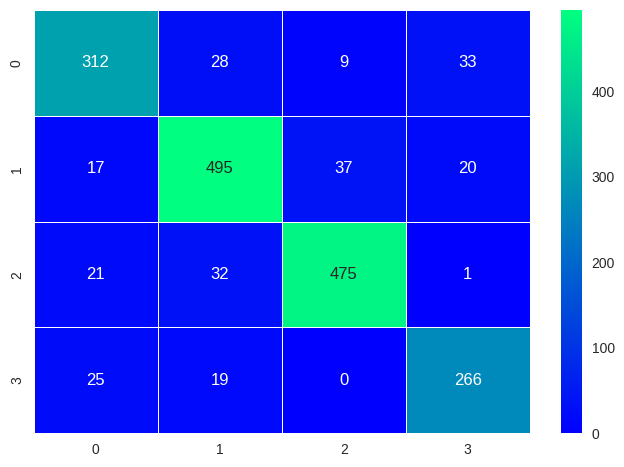

                                                      precision    recall  f1-score   support

                          Pengguna Normal (Standard)       0.83      0.82      0.82       382
Pengguna dengan Cicilan Pembelian dan Minimal Kredit       0.86      0.87      0.87       569
          Pengguna dengan Pembelian dan Kredit Besar       0.91      0.90      0.90       529
             Pengguna yang Bergantung Pada Uang Muka       0.83      0.86      0.84       310

                                            accuracy                           0.86      1790
                                           macro avg       0.86      0.86      0.86      1790
                                        weighted avg       0.87      0.86      0.86      1790



In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap = 'winter')
plt.show()
print(classification_report(y_test, y_pred))

* Melihat summary dari evaluasi model

In [ ]:
print('Ringkasan Evaluasi Model Random Forest Classifier')
print('Akurasi :', accuracy_score(y_test, y_pred))
print('Presisi :', precision_score(y_test,y_pred, average='macro'))
print('Recall :', recall_score(y_test,y_pred, average='macro'))
print('F1 Score :', f1_score(y_test,y_pred, average='macro'))

Ringkasan Evaluasi Model Random Forest Classifier
Akurasi : 0.864804469273743
Presisi : 0.8593318978345048
Recall : 0.860671580917052
F1 Score : 0.8599136386023081


Dari Evaluasi model diketahui bahwa hasil akurasi model random forest classifier yaitu 86% (0.864) yang artinya hasil sudah baik dan bisa dibilang akurat sehingga model ini bisa digunakan untuk dilakukan penentuan cluster pengguna.

* Melakukan prediksi penentuan cluster

In [ ]:
print('--- PREDIKSI PENENTUAN CLUSTER PENGGUNA KARTU KREDIT MENGGUNAKAN RANDOM FOREST ---')
print('='*100)

saldo = float(input('Jumlah Saldo Pengguna (exp : 40.9321) = '))
frekuensisaldo = float(input('Jumlah Frekuensi Saldo Pengguna (exp : 0.9450) = '))
pembelian = float(input('Jumlah Pembelian yang Dilakukan Pengguna (exp : 16.0) = '))
pembelianoneoff = float(input('Banyaknya Satu Kali Pembelian yang Dilakukan Pengguna (exp : 16.0) = '))
pembelianangsuran = float(input('Jumlah Pembelian Angsuran yang Dilakukan Pengguna (exp : 95.0) = '))
penarikantunai = float(input('Jumlah Penarikan Tunai yang Dilakukan Pengguna (exp : 205.23) = '))
bataskredit = float(input('Jumlah Batas Kredit Pengguna (exp : 7000.0) = '))
pembayaran = float(input('Jumlah Pembayaran yang Harus Dibayarkan Pengguna (exp : 312.87) = '))
minimalpembayaran = float(input('Jumlah Minimal Pembayaran yang Harus Dibayarkan Pengguna (exp : 1072.87) = '))
jangkawaktu = int(input('Jangka Waktu Pengguna Kredit (inputan : 6/7/8/9/10/11/12) = '))

val = [saldo, frekuensisaldo, pembelian, pembelianoneoff, pembelianangsuran, penarikantunai, bataskredit, pembayaran,
       minimalpembayaran, jangkawaktu]
print(val)

predict_rfc = RFC.predict([val])
print('='*100)
print('Berdasarkan analisa, pengguna masuk kedalam cluster : ', predict_rfc)

--- PREDIKSI PENENTUAN CLUSTER PENGGUNA KARTU KREDIT MENGGUNAKAN RANDOM FOREST ---
Jumlah Saldo Pengguna (exp : 40.9321) = 40.900749
Jumlah Frekuensi Saldo Pengguna (exp : 0.9450) = 0.818182
Jumlah Pembelian yang Dilakukan Pengguna (exp : 16.0) = 95.40
Banyaknya Satu Kali Pembelian yang Dilakukan Pengguna (exp : 16.0) = 0.00
Jumlah Pembelian Angsuran yang Dilakukan Pengguna (exp : 95.0) = 95.4
Jumlah Penarikan Tunai yang Dilakukan Pengguna (exp : 205.23) = 0.000000	
Jumlah Batas Kredit Pengguna (exp : 7000.0) = 1000.0
Jumlah Pembayaran yang Harus Dibayarkan Pengguna (exp : 312.87) = 201.802084
Jumlah Minimal Pembayaran yang Harus Dibayarkan Pengguna (exp : 1072.87) = 139.509787
Jangka Waktu Pengguna Kredit (inputan : 6/7/8/9/10/11/12) = 12
[40.900749, 0.818182, 95.4, 0.0, 95.4, 0.0, 1000.0, 201.802084, 139.509787, 12]
Berdasarkan analisa, pengguna masuk kedalam cluster :  ['Pengguna Normal (Standard)']


---
##**Kesimpulan**
---

Adapun kesimpulan dari analisis yang kami lakukan adalah sebagai berikut :
1. Pada proses data cleansing, untuk mengatasi nilai hilang (missing value) digunakan median sebagai pengisi dari nilai tersebut.
2. Berdasarkan analisis, model yang dapat kami gunakan untuk melakukan clustering terhadap dataset CC GENERAL.csv adalah K-Means, PCA serta UMAP application untuk pengurangan dimensi data yang lebih baik.
3. Pada model K-Means, kami menggunakan 4 cluster (Middle Ground, High Credit Frequent Purchasers, High Cash Adance Users, dan Frugal Credit Users). Sedangkan pada PCA kami mengatur nilai standar pada variance 80% dengan menggunakan 7 components, yang kemudian jumlah component tersebut direduksi menjadi 2 dimensi menggunakan UMAP Application.
4. Hasil dari performance matrics dari fitur scalling menggunakan Standard Scaller, diperoleh Davies-Bouldin index = 0.8126947149251343 dan Silhouette Score = 0.4273034334182739. Yang dimana, untuk DBI score semakin mendekati nol maka akan semakin baik cluster tersebut. Dan untuk Silhoutte score semakin mendekati satu makan akan semakin baik pula dalam melakukan clustering
5. Tingkat akurasi yang didapatkan dalam melakukan clustering menggunakan Random Forest Classifier cukup tinggi, yaitu diangka 86,4%.
6. Hasil analisis menggunakan metode elbow, dapat disimpulkan bahwa banyaknya cluster yang paling optimal berada diangka 4. Cluster-cluster tersebut adalah Pengguna Normal (Standard) sebanyak 17%, Pengguna dengan Cicilan Pembelian dan Minimal Kredit sebanyak 21%, Pengguna dengan Pembelian dan Kredit Besar sebanyak 31%, dan Pengguna yang Bergantung Pada Uang Muka sebanyak 31%.
7. Variable yang digunakan dalam melakukan prediksi diantaranya adalah saldo, frekuensisaldo, pembelian, pembelianoneoff, pembelianangsuran, penarikantunai, bataskredit, pembayaran, minimalpembayaran, jangkawaktu. Sedangkan untuk target adalah labels berupa 4 cluster yang telah ditentukan